______________________________________
# <center>**Trabajo Practico Nº1 para la Materia *Organización de Datos***</center>

*Integrantes*: 
- 103963	Carolina Di Matteo	cdimatteo@fi.uba.ar
- 101231	Pablo Salvador Dimartino	pdimartino@fi.uba.ar
- 100113	Juan Sebastian Burgos	jsburgos@fi.uba.ar
- 104415	Valentina Laura Correa	vcorrea@fi.uba.ar

*Grupo*: 14

*Repositorio*: [github](https://github.com/valencorrea/7506R-2C2022-GRUPO14)

*Curso*: Rodriguez

*Cuatrimestre*: 2c2022
______________________________________



**Set Up**

In [ ]:
pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install 'geopandas'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install 'pyclustertend'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importación de librerías
import dtreeviz.trees as dtreeviz

import numpy as np
import cmath as math

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker
import pandas as pd
import geopandas as gpd

import seaborn as sns

import scipy as sc

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from pyclustertend import hopkins
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from joblib import dump

#Configuración de Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Ejecución con Drive
if 'google.colab' in str(get_ipython()):
    IN_COLAB = True
else:
    IN_COLAB = False

if IN_COLAB :
    from google.colab import drive
    drive.mount('/content/drive')
    properati = pd.read_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/properati_argentina_2021.csv')
else:
    properati=pd.read_csv('properati_argentina_2021.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#  **1. Análisis Exploratorio y Preprocesamiento de Datos**

## **1a. Exploración Inicial**


Como se indica inicialmente en el enunciado del trabajo práctico, prodecemos a hacer una división de nuestro data set con el cual vamos a trabajar. 

Lo que haremos será definir un 80% del mismo como el conjunto de entrenamiento, y el 20% restante lo usaremos para poder testear nuevos valores.

In [ ]:
df_original = properati.copy()
df = df_original.sample(frac=0.8, random_state=200)
test = df_original.drop(df.index)

A continuación se realizará un análisis general de cada una de las variables presentes en el dataframe.

In [ ]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Actualmente los únicos dos tipos de datos que tenemos son Float64 y Object.

Viendo las primeras entradas, podemos observar que el tipo Object oculta fechas que se adecuan mejor al tipo de datos DateTime.

In [ ]:
df.head(5)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
160116,JWtrhLm/BULQ5NeyL9xoqA==,2021-07-14,2021-08-21,2021-07-14,-34.597419,-58.403760,Capital Federal,Recoleta,NaN,NaN,NaN,Venta,Departamento,1.0,1.0,41.0,37.0,NaN,NaN,Excelente monoambiente con balcón Apto profesi...
92828,1gMQ4rXcpnPs+hhvW11Jdw==,2021-08-03,2021-10-28,2021-08-03,-34.622385,-58.448886,Capital Federal,Caballito,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,113.0,97.0,288000.0,USD,"Vta. Dpto. 4amb, Caballito, balcón aterrazado ..."
327725,olHo7dLW4pHQnVQhAuv6/Q==,2021-12-14,2022-01-27,2021-12-14,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,NaN,Venta,Local comercial,10.0,NaN,230.0,230.0,250000.0,USD,Local - La Plata
366457,GWMhOXhNCdPicnYbmZpT3w==,2021-04-10,2021-06-05,2021-04-10,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,NaN,Venta,Casa,3.0,2.0,NaN,190.0,300000.0,USD,Casa - Campos de Roca II
19975,p7gmyqzdOy/+odHwH5oPyg==,2021-01-27,2021-06-05,2021-01-27,-34.618084,-58.359912,Capital Federal,Puerto Madero,NaN,NaN,NaN,Venta,Departamento,2.0,1.0,70.0,65.0,450000.0,USD,Departamento con Cochera en Puerto Madero


### Preparación de los datasets

---

Aplicamos los filtros necesarios que figuran en los requerimientos, y cambiamos el dtype de las fechas a DateTime.

In [ ]:
df = df.loc[df['property_type'].isin(["Casa", "PH", "Departamento"])].loc[df['place_l2'].isin(["Capital Federal"])].loc[df['operation'].isin(["Venta"])].loc[df['property_currency'].isin(["USD"])]
df['start_date'] = pd.to_datetime(df['start_date'])
df['created_on'] = pd.to_datetime(df['created_on'])
df.replace(to_replace="9999-12-31", value="", inplace=True)
df['end_date'] = pd.to_datetime(df['end_date'])

max_end_date = max(df['end_date'])
df['start_date'] = df['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['start_date']))
df['end_date'] = df['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
df['created_on'] = df['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['created_on']))


df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Replicamos los filtros realizados para el dataset de test:

In [ ]:
test = test.loc[test['property_type'].isin(["Casa", "PH", "Departamento"])].loc[test['place_l2'].isin(["Capital Federal"])].loc[test['operation'].isin(["Venta"])].loc[test['property_currency'].isin(["USD"])]
test['start_date'] = pd.to_datetime(test['start_date'])
test['created_on'] = pd.to_datetime(test['created_on'])
test.replace(to_replace="9999-12-31", value="", inplace=True)
test['end_date'] = pd.to_datetime(test['end_date'])

max_end_date = max(test['end_date'])
test['start_date'] = test['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['start_date']))
test['end_date'] = test['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
test['created_on'] = test['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['created_on']))

test.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Descripción de Campos

---

A continuación, realizamos una descripción de cada una de las variables del dataset e indicamos cuál de ellas corresponde a una del tipo cualitativa o cuantitativa.

`id`: Identificador del aviso

`start_date`: Fecha de alta del aviso

`end_date`: Fecha de baja del aviso

`created_on`: Fecha de alta de la primera versión del aviso

`latitud`: Ubicación geográfica

`longitud`: Ubicación geográfica

`place_l2`: Nivel administrativo 2, usualmente provincia

`place_l3`: Nivel administrativo 3, usualmente ciudad

`place_l4`: Nivel administrativo 4, usualmente barrio

`place_l5`: Nivel administrativo 5

`place_l6`: Nivel administrativo 6

`operation`: Tipo de operación (venta, alquiler), variable cualitativa

`property_type`: Tipo de propiedad (casa, departamento, ph), variable cualitativa

`property_rooms`: Cantidad de ambientes, variable cuantitativa

`property_bedrooms`: Cantidad de dormitorios, variable cuantitativa

`property_surface_total`: Superficie total en metros cuadrados

`property_surface_covered`: Superficie cubierta en metros cuadrados

`property_price`: Precio publicado en el anuncio

`property_currency`: Moneda del precio publicado, variable cualitativa

`property_title`: Título del anuncio

### Variables Cuantitativas: Medidas de Resumen

---

Calculamos, para la totalidad de las variables que nos brinda el dataset:
- media
- mediana
- q1
- q3 
- moda

In [ ]:
df_cuantitativas = df[['property_rooms', 'property_bedrooms']]

In [ ]:
df_cuantitativas.describe().loc[['mean', '25%', '75%', 'std']].append(df_cuantitativas.median().rename("median"))

,property_rooms,property_bedrooms
mean,2.825187,2.018113
25%,2.000000,1.000000
75%,4.000000,3.000000
std,1.423749,1.134732
median,3.000000,2.000000


### Variables Cualitativas: Cantidades y Frecuencias

---

Realizamos, para las variables `place_l3`, `place_l4` y `property_type` un cálculo de los diferentes valores así también como sus respectivas frecuencias.

In [ ]:
print(f"place_l3 tiene {df.nunique()['place_l3']} valores diferentes")

place_l3 tiene 57 valores diferentes


Text(0.5, 0, 'Variable place_l3')

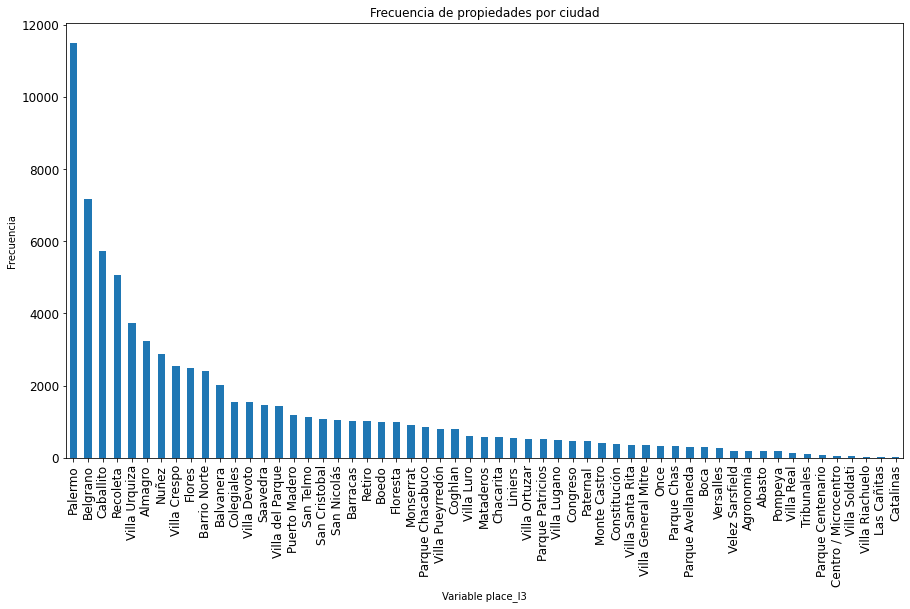

In [ ]:
fig, ax = plt.subplots()
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12)
plt.title('Frecuencia de propiedades por ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l3')

In [ ]:
print(f"place_l4 tiene {df.nunique()['place_l4']} valores diferentes")

place_l4 tiene 4 valores diferentes


Text(0.5, 0, 'Variable place_l4')

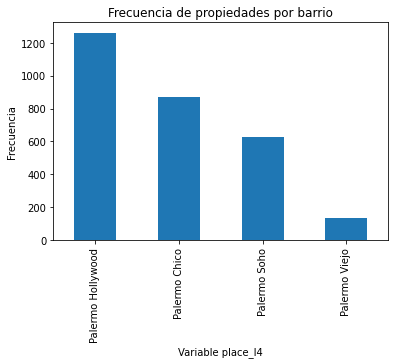

In [ ]:
fig, ax = plt.subplots()
df['place_l4'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l4')

In [ ]:
print(f"property_type tiene {df.nunique()['property_type']} valores diferentes")

property_type tiene 3 valores diferentes


Text(0.5, 0, 'Variable property_type')

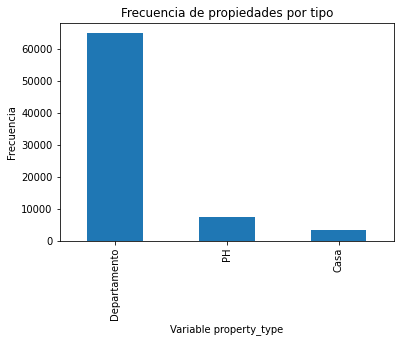

In [ ]:
fig, ax = plt.subplots()
df['property_type'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por tipo')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_type')

### Determinación de Variables Irrelevantes

---

Finalmente, podremos decir que dejamos fuera de este análisis particular a las a las siguientes variables que detallamos a continuación:

- `id`: No contiene información relevante para el análisis.
- `operation`: Sólo hay un tipo de operación según lo solicitado en la consigna y es "Venta", con lo cual la consideramos irrelevante en el análisis.
- `property_currency`: Sólo hay un tipo de cambio según lo solicitado en la consigna y es "USD", con lo cual la consideramos irrelevante en el análisis.
- `place_l5`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `place_l6`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `property_title`: De conocer previamente la información que contiene el dataset, sabemos que la variable en cuestión almacena un único título por publicación, con lo cual la consideramos irrelevante en el análisis.

Las mismas serán eliminadas en la sección de reducción de dimnesionalidad. Es por este motivo que, de aquí en más, no se tendrán en cuenta para los análisis.


### Análisis Gráfico de las Distribuciones de las Variables

---



#### Densidad de la variable `property_price`

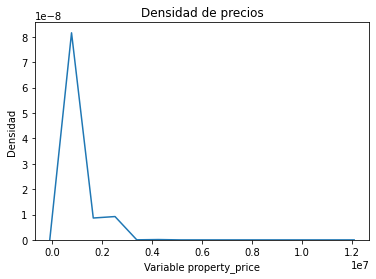

In [ ]:
d = sns.kdeplot(data=df.property_price, gridsize=15).set(title="Densidad de precios",xlabel="Variable property_price",ylabel="Densidad")

#### Densidad de la variable `property_rooms`

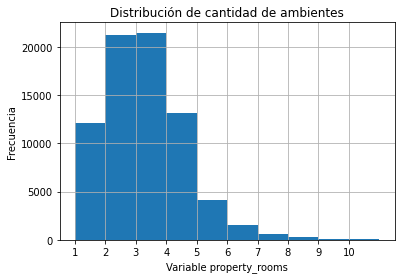

In [ ]:
plt.hist(df.property_rooms, bins=10, range=(1,11))
plt.title('Distribución de cantidad de ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_rooms')
plt.xticks(np.arange(1,11,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_bedrooms`

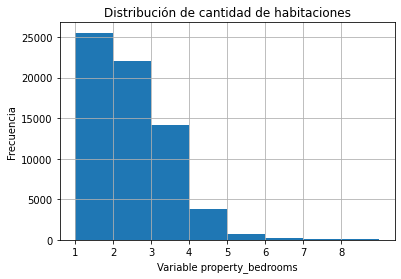

In [ ]:
plt.hist(df.property_bedrooms, bins=8, range=(1,9))
plt.title('Distribución de cantidad de habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_bedrooms')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_surface_covered`

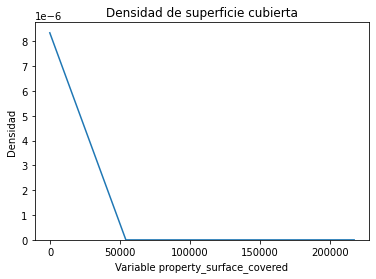

In [ ]:
d = sns.kdeplot(data=df.property_surface_covered, gridsize=5).set(title="Densidad de superficie cubierta",xlabel="Variable property_surface_covered",ylabel="Densidad")

### Análisis de las Correlaciones existentes entre las Variables

---

In [ ]:
#graf_pairplot = sns.pairplot(data=df)

### Conclusiones
----

Luego de tener este primer acercamiento con el dataset pudimos realizar varias observaciones. 

En un primer lugar, luego de explorar las distintas variables que este comprendía, llegamos a la conclusión de que contábamos con varias que ante nuestro problema no iban a presentar relevancia. Es por esta razón que decidimos suprimirlas de nuestros datasets de trabajo, tanto para train como para el que luego usaremos para realizar los tests. 

Además de esto, notamos que teníamos diferencias en los tipos de variables con las cuales contábamos, razón por la cual decidimos explicitar las que se correspondian a cuantitativas o cualitativas, ya que estas aclaraciones luego nos serán de utilidad al momento de determinar los gráficos a realizar. Estos además, nos sirvieron para identificar y tener dimensión de las distribuciones y que tan relacionadas están nuestras variables entre sí. 

Por último realizamos los cálculos de las medidas de resumen sobre estas variables resultantes, las cuales estaremos utilizando para realizar diferentes operaciones a lo largo del trabajo.

## **1b. Datos Faltantes**

A continuación se realizara un análisis sobre los datos faltantes del dataframe.

### Análisis a Nivel Columna

---



Graficamos, para cada variable, el porcentaje (diferente de cero) de datos faltantes con respecto al total del dataset en escala logarítmica.

Text(0.5, 0, 'Variables del dataset')

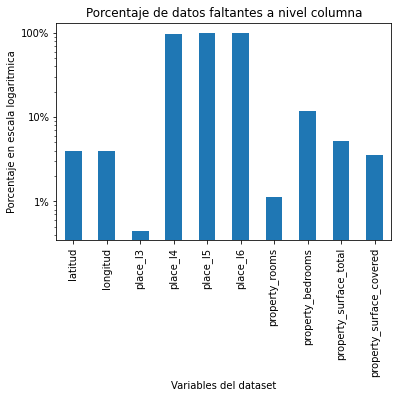

In [ ]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter())
(df.isnull().sum() * 100 / len(df)).replace(0,np.nan).dropna(axis=0,how="all").plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel columna')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Variables del dataset')

### Análisis a Nivel Fila

---



Graficamos el porcentaje de filas con n datos faltantes con respecto al total del dataset.

Text(0.5, 0, 'Cantidad de datos faltantes')

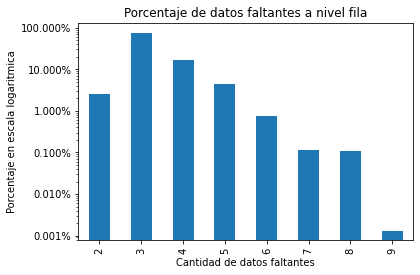

In [ ]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=3))
(df.isnull().sum(axis=1).value_counts().sort_index() * 100 / len(df)).plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel fila')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Cantidad de datos faltantes')

### Reparación de Valores Faltantes

---



A continuación se detallan posibles estrategias para reparar los valores faltantes del dataset.

Guardamos una copia del dataset sin imputaciones realizadas para comparar más adelante:

In [ ]:
df_sin_reparacion = df.copy()

#### Variables `start_date`, `end_date` y `created_on`

Puesto que no hay valores faltantes para las variables de fechas, no es necesario realizar una reparación de las mismas.

#### Variables `place_l3` y `place_l4`

Reemplazamos las locaciones no definidas por el nivel superior:

In [ ]:
df.place_l3.fillna(df.place_l2, inplace=True)
df.place_l4.fillna(df.place_l3, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `place_l3`:


In [ ]:
df["place_l3"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `place_l4`:


In [ ]:
df["place_l4"].isna().sum()

0

Veamos que, al realizar esta imputación de datos las variables `place_l2` y `place_l3` quedan obsoletas pues la información de relevancia respecto a la ubicación de la propiedad en venta se encuentra en la variable `place_l4` y es por esta razón que podremos eliminarlas del dataset. Nos encargaremos de realizar la tarea en cuestión en la sección de reducción de la dimensionalidad y, es por esta razón, que no estaremos utilizándolas en los análisis posteriores.

Replicamos para el dataset de test:

In [ ]:
test.place_l3.fillna(test.place_l2, inplace=True)
test.place_l4.fillna(test.place_l3, inplace=True)

In [ ]:
test["place_l3"].isna().sum()

0

In [ ]:
test["place_l4"].isna().sum()

0

#### Variables `latitud` y `longitud`

Imputamos, a partir de las medias de las variables `latitud` y `longitud` agrupando según los valores de `place_l4` los valores faltantes de `latitud` y `longitud`. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada barrio. Para visualizar las diferencias en la variable previas y posteriores a la imputación de datos, graficamos -a modo de ejemplo- la densidad para el barrio de Palermo:

In [ ]:
medians_latitudes = {}

for barrio in df["place_l4"].unique() :
    lat_median = df.loc[(df["place_l4"] == barrio) & (df['latitud'].notna())].latitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"] = df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"].fillna(lat_median)
    medians_latitudes[barrio] = lat_median

Veamos los valores resultantes en el diccionaro de medias de latitudes:

In [ ]:
medians_latitudes

{'Caballito': -34.6194061,
 'Puerto Madero': -34.6126394,
 'Balvanera': -34.60831005,
 'San Nicolás': -34.6030779,
 'Retiro': -34.59610936185,
 'Villa Urquiza': -34.5736133,
 'Villa del Parque': -34.604529691799996,
 'Colegiales': -34.5760225,
 'Villa Crespo': -34.598273692099994,
 'Almagro': -34.6058615,
 'San Telmo': -34.6209352,
 'Flores': -34.6286921369,
 'Palermo': -34.5820981,
 'Palermo Chico': -34.5794167,
 'Nuñez': -34.548096650000005,
 'Barracas': -34.6358354,
 'Villa General Mitre': -34.610502100000005,
 'Belgrano': -34.5623790515,
 'Parque Avellaneda': -34.6448557,
 'Parque Chacabuco': -34.6347007,
 'Versalles': -34.6296804,
 'Recoleta': -34.5920227,
 'Boedo': -34.62756628955,
 'Monte Castro': -34.621131,
 'Palermo Hollywood': -34.58057085,
 'Villa Real': -34.6207965,
 'Boca': -34.63204751155,
 'Barrio Norte': -34.59381705,
 'Saavedra': -34.5512603978,
 'Coghlan': -34.5614349,
 'Velez Sarsfield': -34.63229,
 'Mataderos': -34.6551649,
 'Villa Ortuzar': -34.5821500876,
 'Pater

In [ ]:
medians_longitudes = {}

for barrio in df["place_l4"].unique() :
    long_median = df.loc[(df["place_l4"] == barrio) & (df['longitud'].notna())].longitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"] = df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"].fillna(long_median)
    medians_longitudes[barrio] = long_median

Veamos los valores resultantes en el diccionaro de medias de longitudes:

In [ ]:
medians_longitudes

{'Caballito': -58.4412248,
 'Puerto Madero': -58.3618883,
 'Balvanera': -58.402031449999996,
 'San Nicolás': -58.3834625,
 'Retiro': -58.3785708,
 'Villa Urquiza': -58.4861351,
 'Villa del Parque': -58.48984955,
 'Colegiales': -58.45016895,
 'Villa Crespo': -58.4407171,
 'Almagro': -58.4223603,
 'San Telmo': -58.3748503,
 'Flores': -58.46332195,
 'Palermo': -58.42346605,
 'Palermo Chico': -58.4072524,
 'Nuñez': -58.46633,
 'Barracas': -58.3739745,
 'Villa General Mitre': -58.4683198,
 'Belgrano': -58.4544909,
 'Parque Avellaneda': -58.477562,
 'Parque Chacabuco': -58.4379678,
 'Versalles': -58.5200459,
 'Recoleta': -58.3959194307,
 'Boedo': -58.41800275,
 'Monte Castro': -58.504708,
 'Palermo Hollywood': -58.435209650000004,
 'Villa Real': -58.5244913,
 'Boca': -58.3629598,
 'Barrio Norte': -58.40413825,
 'Saavedra': -58.4824258,
 'Coghlan': -58.474658500000004,
 'Velez Sarsfield': -58.4926237,
 'Mataderos': -58.5035614,
 'Villa Ortuzar': -58.4689315,
 'Paternal': -58.4646755,
 'Parque

Calculamos la cantidad de datos nulos restantes para la variable `latitud`:


In [ ]:
df["latitud"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `longitud`:


In [ ]:
df["longitud"].isna().sum()

0

Replicamos para el dataset de test:

In [ ]:
for barrio in test["place_l4"].unique() :
    lat_median = medians_latitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"] = test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"].fillna(lat_median)

In [ ]:
for barrio in test["place_l4"].unique() :
    long_median = medians_longitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"] = test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"].fillna(long_median)

In [ ]:
test["latitud"].isna().sum()

0

In [ ]:
test["longitud"].isna().sum()

0

#### Variables `property_surface_total` y `property_surface_covered`

Cuando se tiene la superficie total pero no la cubierta o viceversa, reemplazamos los valores faltantes con su contraparte

In [ ]:
df.property_surface_total.fillna(df.property_surface_covered, inplace=True)
df.property_surface_covered.fillna(df.property_surface_total, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_total`:


In [ ]:
df["property_surface_total"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_covered`:

In [ ]:
df["property_surface_covered"].isna().sum()

0

Replicamos para el dataset de test:

In [ ]:
test.property_surface_total.fillna(test.property_surface_covered, inplace=True)
test.property_surface_covered.fillna(test.property_surface_total, inplace=True)

In [ ]:
test["property_surface_total"].isna().sum()

0

In [ ]:
test["property_surface_covered"].isna().sum()

0

#### Variables `property_rooms` y `property_bedrooms`

Reemplazamos la cantidad de habitaciones no definidas por la media calculada filtrando por cantidad total de dormitorios. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada cantidad de ambientes.

In [ ]:
cant = df.loc[(df['property_rooms'].isna()) & (df['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values
medians_rooms = {}

for i in cant:
    median = df.loc[(df['property_rooms'].notna()) & (df['property_bedrooms'] == i)].property_rooms.median()
    df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"] = df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"].fillna(median)
    medians_rooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de ambientes:

In [ ]:
medians_rooms

{3.0: 4.0,
 2.0: 3.0,
 4.0: 5.0,
 1.0: 2.0,
 5.0: 6.0,
 6.0: 7.0,
 7.0: 8.0,
 10.0: 12.0,
 8.0: 9.0,
 11.0: 11.0,
 9.0: 10.0,
 14.0: 15.0,
 13.0: 15.0,
 12.0: 14.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [ ]:
df["property_rooms"].isna().sum()

341

Para eliminar los últimos valores nulos en las columnas de ambientes, lo completamos con una regresión en funcion de la superficie cubierta:

In [ ]:
df_rooms = df.loc[df['property_rooms'].notna()]
reg_rooms = LinearRegression().fit(np.array(df_rooms['property_surface_covered']).reshape(-1, 1), df_rooms['property_rooms'])

In [ ]:
df_topredict = df.loc[df['property_rooms'].isna()]['property_surface_covered']
df['property_rooms'] = df.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [ ]:
df["property_rooms"].isna().sum()

0

Luego reemplazamos la cantidad total de dormitorios no definidas por la media calculada filtrando por cantidad de ambientes.

Esto redujo el porcentaje de valores no definidos para los dormitorios y ambientes a menos de 1%, desde 10% y 1,5% respectivamente.

In [ ]:
cant = df.loc[(df['property_bedrooms'].isna()) & (df['property_rooms'].notna())].property_rooms.value_counts().index.values
medians_bedrooms = {}

for i in cant:
    median = df.loc[df['property_rooms'] == i].property_bedrooms.median()
    if pd.isna(median):
        median = df.loc[df['property_rooms'] == i]['property_rooms'].iloc[0]
    df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"] = df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"].fillna(median)
    medians_bedrooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de dormitorios:

In [ ]:
medians_bedrooms

{1.0: 1.0,
 3.0: 2.0,
 2.0: 1.0,
 4.0: 3.0,
 5.0: 4.0,
 6.0: 4.0,
 7.0: 4.0,
 10.0: 6.0,
 12.0: 8.0,
 9.0: 5.0,
 8.0: 5.0,
 15.0: 13.0,
 11.0: 8.0,
 35.0: 35.0,
 33.0: 33.0,
 14.0: 11.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_bedrooms`:



In [ ]:
df["property_bedrooms"].isna().sum()

0

Replicamos para el dataset de test:

In [ ]:
cant = test.loc[(test['property_rooms'].isna()) & (test['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values

for i in cant:
    median = medians_rooms[i]
    test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"] = test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"].fillna(median)

In [ ]:
test['property_rooms'] = test.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

In [ ]:
test["property_rooms"].isna().sum()

0

In [ ]:
cant = test.loc[(test['property_bedrooms'].isna()) & (test['property_rooms'].notna())].property_rooms.value_counts().index.values

for i in cant:
    if i not in medians_bedrooms:
        median = test.loc[test['property_rooms'] == i]['property_rooms'].iloc[0]
    else:
        median = medians_bedrooms[i]
    test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"] = test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"].fillna(median)

In [ ]:
test["property_bedrooms"].isna().sum()

0

#### Conclusiones

A partir de la presencia de valores faltantes en cada una de las variables trabajadas, realizamos distintos tipos de imputaciones según lo que requería cada una, entre ellos: completar con el nivel inmediatamente anterior, reemplazar con el valor de la media correspondiente, y, predecir mediante regresión lineal.

Para las variables `place_l3` y `place_l4` tomamos la decisión de completar los valores faltantes con el valor previo dado que las mismas son de tipo `str` y no admiten cálculos numéricos. A continuación, podemos apreciar la diferencia obtenida entre las distribuciones de las variables previas y posteriores a la imputación de datos.

In [ ]:
#fig, ax = plt.subplots()
#df_sin_reparacion['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
#df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
#plt.title('Frecuencia de Propiedades por Ciudad')
#plt.ylabel('Frecuencia')
#plt.xlabel('Ciudades')

Como podemos notar, al ser bajo el porcentaje de datos faltantes para la variable `place_l3`, la distribución de la misma no presenta grandes cambios a pesar de la imputación realizada.

Text(0.5, 0, 'Barrios')

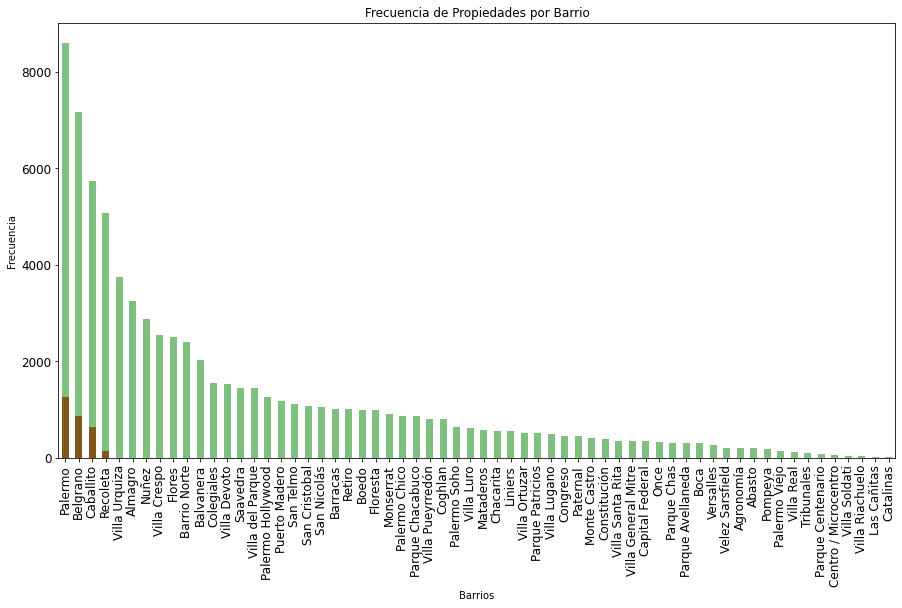

In [ ]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Barrios')

Por el contrario de lo observado en el gráfico anterior, dado que la variable `place_l4` tenía un alto grado de valores faltantes (casi del 100% sobre todo el dataset), y puesto que los mismos fueron reemplazados por su antecesor inmediato (es decir: los valores existentes en `place_l3`) es esperable que la distribución de la misma tenga un cambio significativo luego de la imputación realizada. Más aún: es inclusive muy similar a la distribución de `place_l3`.

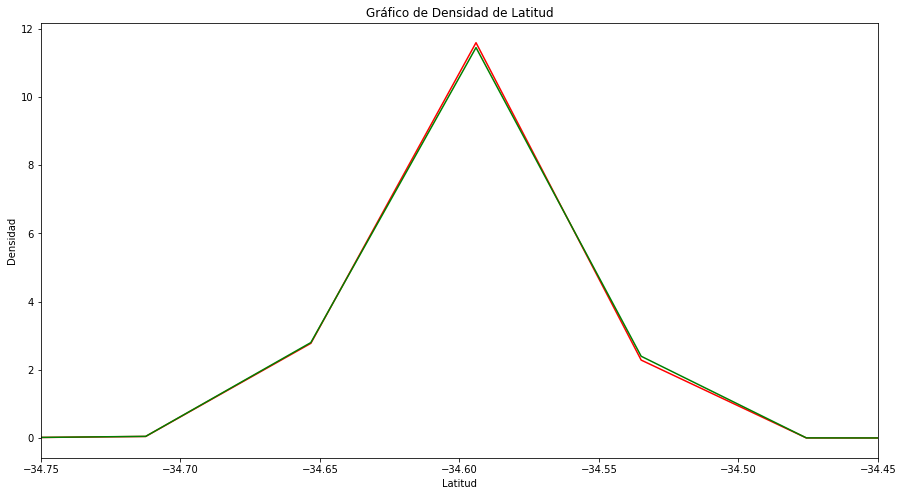

In [ ]:
df_sin_reparacion.latitud.plot.density(color = "red")
grf = df.latitud.plot.density(color = "green", figsize=(15,8), xlim = (-34.75,-34.45)).set(xlabel="Latitud", ylabel="Densidad", title="Gráfico de Densidad de Latitud")

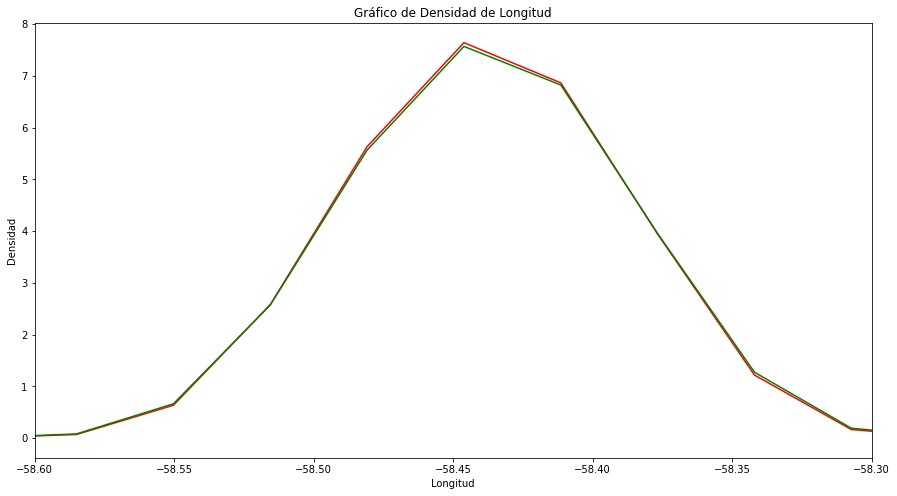

In [ ]:
df_sin_reparacion.longitud.plot.density(color = "red")
grf = df.longitud.plot.density(color = "green", figsize=(15,8), xlim = (-58.6,-58.3)).set(xlabel="Longitud", ylabel="Densidad", title="Gráfico de Densidad de Longitud")

Tanto para las variables de `latitud` y `longitud`, el método que utilizamos fue el de reemplazar los valores faltantes por las medias correspondientes. Como podemos ver en los gráficos anteriores, estas variables tenían un pequeño porcentaje de datos ausentes, de modo que sus distribuciones no tienen cambios significativos a pesar de la imputación realizada.

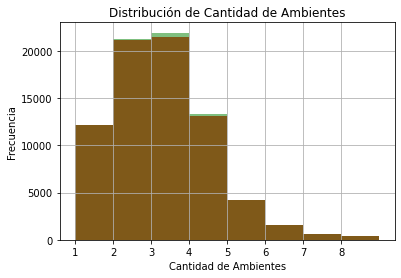

In [ ]:
plt.hist(df_sin_reparacion.property_rooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_rooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Ambientes')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

Teniendo en cuenta que la proporción de valores faltantes en la variable `property_rooms` representa una cantidad significativa pero no de alto impacto sobre la totalidad del dataset, es esperable que al comparar los resultados obtenidos respecto de los iniciales no obtengamos una alta diferencia entre los mismos.

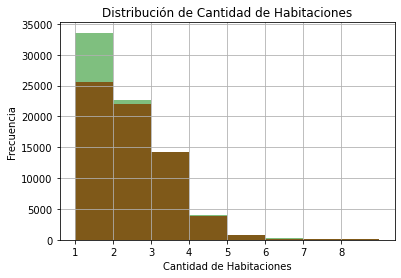

In [ ]:
plt.hist(df_sin_reparacion.property_bedrooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_bedrooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Habitaciones')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

A diferencia del análisis previo, podemos observar que al aumentar la cantidad de datos faltantes para la variable `property_bedrooms` -respecto de `property_rooms`-, tenemos un mayor nivel de diferencia entre las distribuciones de la variable previa y posteriormente a la imputación realizada.

Finalmente, podemos verificar que la totalidad de datos faltantes sobre los datasets tanto de train como de test fue reparada:

In [ ]:
df.isna().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                        0
place_l4                        0
place_l5                    75644
place_l6                    75644
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_price                  0
property_currency               0
property_title                  0
dtype: int64

In [ ]:
test.isna().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                        0
place_l4                        0
place_l5                    18605
place_l6                    18605
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_price                  0
property_currency               0
property_title                  0
dtype: int64

## **1c. Valores atípicos**

A continuación realizaremos un análisis sobre los valores atípicos presentes en el dataset.

Generamos una función de impresión de medidas del gráfico Box Plot para una columna:

In [ ]:
def print_box_plot_medidas(df_c):
  Q1 = df_c.describe().get("25%")
  Q3 = df_c.describe().get("75%")

  print(f"El valor de Q1 es: {Q1}")
  print(f"El valor de Q3 es: {Q3}")

  IQR = Q3 - Q1

  out_inf = Q1 - 1.5 * IQR
  out_sup = Q3 + 1.5 * IQR

  print(f"El limite inferior del Q1 es: {out_inf}")
  print(f"El limite superior del Q3 es: {out_sup}")

### Análisis Univariado

---

#### Técnica Box Plot

Hagamos un gráfico de tipo box plot para visualizar los posibles valores atípicos de cada una de las variables presentes en el universo de datos numéricos:

##### Variable `start_date`

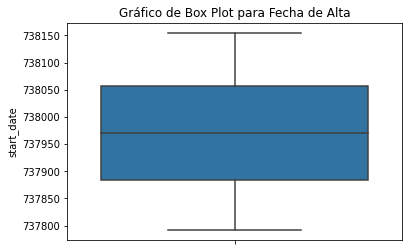

In [ ]:
sns.boxplot(y=df.start_date)
plt.title("Gráfico de Box Plot para Fecha de Alta")
plt.show()

In [ ]:
print(f"Medidas para Fecha de Alta:")

print_box_plot_medidas(df.start_date)

Medidas para Fecha de Alta:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Del gráfico podemos ver que no existen outliers para la variable en cuestión.

##### Variable `end_date`

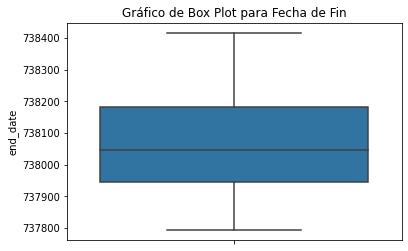

In [ ]:
sns.boxplot(y=df.end_date)
plt.title("Gráfico de Box Plot para Fecha de Fin")
plt.show()

In [ ]:
print(f"Medidas para Fecha de Fin:")

print_box_plot_medidas(df.end_date)

Medidas para Fecha de Fin:
El valor de Q1 es: 737946.0
El valor de Q3 es: 738182.0
El limite inferior del Q1 es: 737592.0
El limite superior del Q3 es: 738536.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `created_on`

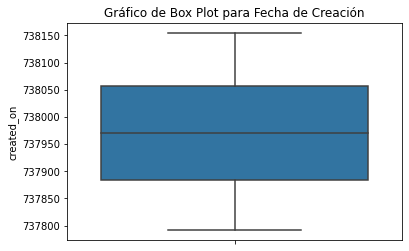

In [ ]:
sns.boxplot(y=df.created_on)
plt.title("Gráfico de Box Plot para Fecha de Creación")
plt.show()

In [ ]:
print(f"Medidas para Fecha de Creación:")

print_box_plot_medidas(df.created_on)

Medidas para Fecha de Creación:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `latitud`

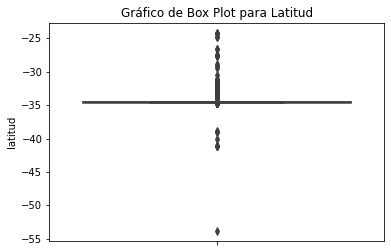

In [ ]:
sns.boxplot(y=df.latitud)
plt.title("Gráfico de Box Plot para Latitud")
plt.show()

In [ ]:
print(f"Medidas para Latitud:")

print_box_plot_medidas(df.latitud)

Medidas para Latitud:
El valor de Q1 es: -34.6155326
El valor de Q3 es: -34.5770878
El limite inferior del Q1 es: -34.673199800000006
El limite superior del Q3 es: -34.519420600000004


Si bien este gráfico no nos brinda mucha información, pues los valores límites inferior y superior son muy cercanos y eso nos da la pauta de que hay una gran variabilidad en los datos, podríamos pensar que es extraña la observación que se encuentra por debajo del valor -50. En esta línea, observemos el registro en cuestión:

In [ ]:
df[df.latitud < -50]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
457631,ZskNGaMaM9MxJ4seQfgjtg==,737918,738010,737918,-53.788624,-67.718089,Capital Federal,Capital Federal,Capital Federal,NaN,NaN,Venta,Departamento,3.0,2.0,121.0,100.0,375000.0,USD,Depto 3 ambientes Arboris Las Lomas


A priori no podríamos realizar una conclusión sólida, puesto que sería conveniente estudiar el resto de las variables en conjunto. Por ejemplo, verificar -utilizando el dato de longitud- si realmente pertenece a una coordenada correspondiente a la Capital Federal.

##### Variable `longitud`

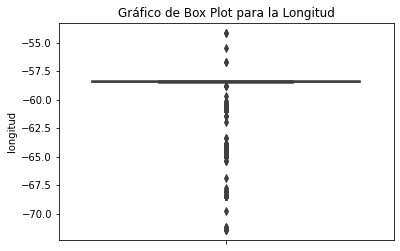

In [ ]:
sns.boxplot(y=df.longitud)
plt.title("Gráfico de Box Plot para la Longitud")
plt.show()

In [ ]:
print(f"Medidas para Longitud:")

print_box_plot_medidas(df.longitud)

Medidas para Longitud:
El valor de Q1 es: -58.466182
El valor de Q3 es: -58.40879845
El limite inferior del Q1 es: -58.552257325000014
El limite superior del Q3 es: -58.322723124999996


De igual forma que para el análisis previo, el gráfico y el resumen de las medidas para la variable en cuestión no nos brindan información acerca de valores atípicos reales ya que el rango intercuantil es pequeño. Con este análisis, no podríamos concluir que existen valores atípicos para la variable `longitud`.

##### Variable `property_rooms`

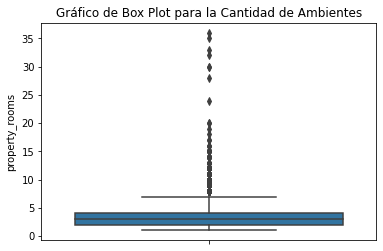

In [ ]:
sns.boxplot(y=df.property_rooms)
plt.title("Gráfico de Box Plot para la Cantidad de Ambientes")
plt.show()

In [ ]:
print(f"Medidas para Cantidad de Ambientes:")

print_box_plot_medidas(df.property_rooms)

Medidas para Cantidad de Ambientes:
El valor de Q1 es: 2.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: -1.0
El limite superior del Q3 es: 7.0


De analizar el gráfico y las medidas, podríamos pensar que una cantidad de ambientes mayor a 7 podría representar un outlier. Ahora bien, tengamos en cuenta que en nuestro universo de datos estamos analizando tanto Departamentos como Casas y PH de modo que no podríamos concluir con firmeza -en este primer análisis univariado- que todas las observaciones por encima de estos límites son valores atípicos.

##### Variable `property_bedrooms`



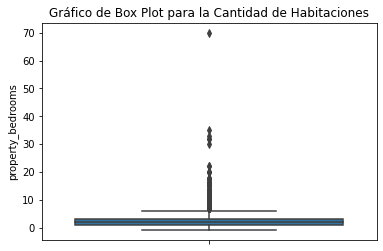

In [ ]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

In [ ]:
print(f"Medidas para Cantidad de Habitaciones:")

print_box_plot_medidas(df.property_bedrooms)

Medidas para Cantidad de Habitaciones:
El valor de Q1 es: 1.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: -2.0
El limite superior del Q3 es: 6.0


Particularmente para este gráfico, podríamos notar una masa de posibles outliers cerca del límite superior del box plot y una única observación alejada de la masa en cuestión.
Respecto de la masa de posibles valores atípicos, haríamos un razonamiento similar al que realizamos para la variable anterior: tendríamos que hacer un análisis multivariado para poder consolidar una conclusión.
Ahora bien, vale la pena estudiar la observación que supera el 60:

In [ ]:
df[df.property_bedrooms > 60]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
94998,4TbEkLoqy/0c3zakd66/FQ==,738057,738182,738057,-34.646632,-58.497902,Capital Federal,Villa Luro,Villa Luro,NaN,NaN,Venta,Departamento,3.0,70.0,70.0,70.0,135000.0,USD,Departamento - Villa Luro


Claramente estamos ante una situación de valor atípico, de modo que procedemos a eliminar el mismo:

In [ ]:
df.drop(df[df.property_bedrooms > 60].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

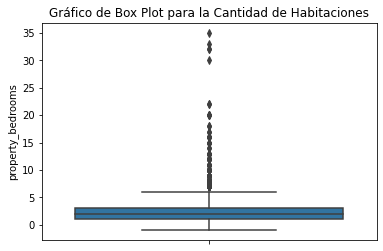

In [ ]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

Estudiamos la presencia de valores nulos o negativos:

In [ ]:
df[df.property_bedrooms <= 0]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
406880,3WI+zCCMeb9TR5kOBm7rhg==,737797,737867,737797,-34.577595,-58.495185,Capital Federal,Villa Urquiza,Villa Urquiza,NaN,NaN,Venta,Departamento,2.0,-1.0,61.0,43.0,125000.0,USD,Jardines de Roosevelt - Hermoso 3 ambientes co...


Dado que no es posible la existencia del mismo, procedemos a corregir el outlier. En este caso, estaremos reemplazando el valor negativo por su equivalente absoluto:

In [ ]:
df.property_bedrooms[df[df.property_bedrooms <= 0].index] = abs(df.property_bedrooms[df[df.property_bedrooms <= 0].index])

Nuevamente, realizamos el gráfico de Box Plot:

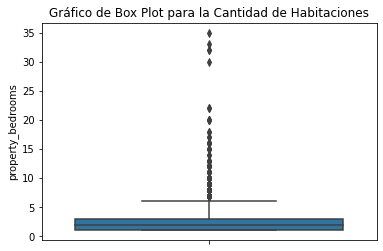

In [ ]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

##### Variable `property_surface_total`

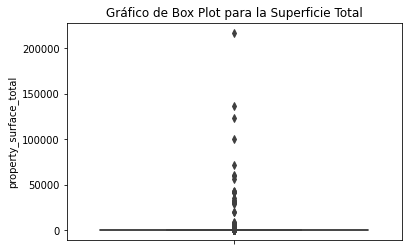

In [ ]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

In [ ]:
print(f"Medidas para Superficie Total:")

print_box_plot_medidas(df.property_surface_total)

Medidas para Superficie Total:
El valor de Q1 es: 45.0
El valor de Q3 es: 105.0
El limite inferior del Q1 es: -45.0
El limite superior del Q3 es: 195.0


De analizar el gráfico, podríamos pensar que los valores por encima del límite superior del box plot realmente pertenecerían a valores atípicos de la variable, ya que es extraño que un Departamento/Casa/PH tenga una superficie mayor a 20.000 m2. En esta línea, estudiemos dichos registros:

In [ ]:
df[df.property_surface_total > 19500].head(5)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
370917,OC6HYSBo/pqio5ZTLgoPvg==,737904,737946,737904,-34.571747,-58.422612,Capital Federal,Palermo,Palermo,NaN,NaN,Venta,Departamento,4.0,3.0,42110.0,222.0,1910920.0,USD,Reventa - Departamento - Palermo Nuevo - Liber...
352883,aBZBrjan1XqHjgvjHK6K6Q==,737966,737979,737966,-34.550093,-58.483034,Capital Federal,Saavedra,Saavedra,NaN,NaN,Venta,Departamento,1.0,1.0,29064.0,29064.0,87400.0,USD,VENTA MONOAMBIENTE SAAVEDRA A ESTRENAR
72316,BPTyNzwU2D4btCduu8ls3A==,737939,737949,737939,-34.578917,-58.429373,Capital Federal,Palermo,Palermo,NaN,NaN,Venta,Departamento,2.0,1.0,61130.0,53030.0,225000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES PALERMO C/AMENI...
372779,XzTb7kTEpmAKiyhEGSWz4A==,738026,738036,738026,-34.555278,-58.459786,Capital Federal,Belgrano,Belgrano,NaN,NaN,Venta,Departamento,4.0,3.0,100068.0,100051.0,420000.0,USD,VENTA PISO 4 AMBIENTES BELGRANO COCHERA BALCON
106598,+YPtNPAzbhoDCLgqF26Q8A==,737860,737900,737860,-34.587320,-58.401556,Capital Federal,Barrio Norte,Barrio Norte,NaN,NaN,Venta,Departamento,2.0,1.0,56740.0,52540.0,175000.0,USD,EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG...


Veamos qué porcentaje representan dichos datos sobre el total:

In [ ]:
pct = df[df.property_surface_total > 19500].shape[0] / df.property_surface_total.shape[0] * 100
print(f"Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un {round(pct,3)}% del total.")

Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un 0.033% del total.


Dado que los valores atípicos detectados representan un índice bajo sobre el total de datos, procedemos a eliminarlos del dataset:

In [ ]:
df.drop(df[df.property_surface_total > 19500].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

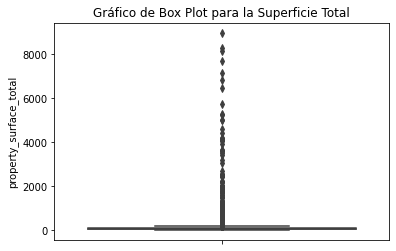

In [ ]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

##### Variable `property_surface_covered`

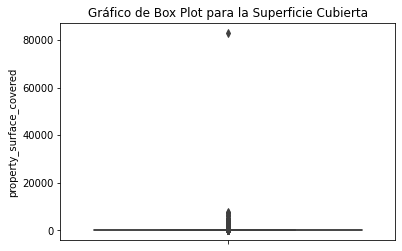

In [ ]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

In [ ]:
print(f"Medidas para Superficie Cubierta:")

print_box_plot_medidas(df.property_surface_covered)

Medidas para Superficie Cubierta:
El valor de Q1 es: 40.0
El valor de Q3 es: 89.0
El limite inferior del Q1 es: -33.5
El limite superior del Q3 es: 162.5


Nuevamente, visualizamos una masa de observaciones detectada como valores atípicos cercanas al límite superior del Box Plot y una única observación lejana. Estudiamos la misma:

In [ ]:
df[df.property_surface_covered > 80000]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
199905,EDZUWORq83zRgdk9Zqlv+A==,737996,738417,737996,-34.604362,-58.392366,Capital Federal,Barrio Norte,Barrio Norte,NaN,NaN,Venta,Departamento,4.0,3.0,83.0,83000.0,155000.0,USD,AMPLIO DEPTO EN VENTA BARRIO NORTE


Procedemos a eliminar dicha observación puesto que corresponde en su totalidad a un valor atípico:

In [ ]:
df.drop(df[df.property_surface_covered > 80000].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

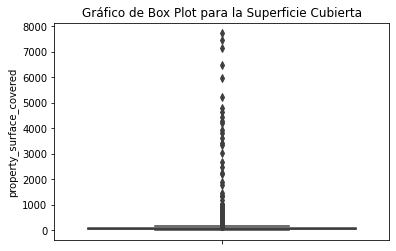

In [ ]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

#### Técnica Z Score

Para seguir con el análisis, evaluamos si las variables cumplen con la regla de oro |Z| > 3. Tomamos la convención de eliminar del dataset todos los valores detectados como atípicos, según el método, que representen un porcentaje menor al 1% del total de datos ya que decidimos que este porcentaje de datos eliminados no representará un fuerte impacto en el conjunto de datos resultante.

##### Variable `start_date`

In [ ]:
z_score = (df.start_date - np.mean(df.start_date)) / np.std(df.start_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Como notamos anteriormente, no se observan registros de valores atípicos dentro de esta variable.

##### Variable `end_date`

In [ ]:
z_score = (df.end_date - np.mean(df.end_date)) / np.std(df.end_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Confirmamos nuevamente que para end_date no se registran valores atípicos.

##### Variable `created_on`

In [ ]:
z_score = (df.created_on - np.mean(df.created_on)) / np.std(df.created_on)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Concluimos que `created_on` tampoco presenta observaciones atípicas.

##### Variable `latitud`

In [ ]:
z_score = (df.latitud - np.mean(df.latitud)) / np.std(df.latitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 291 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 10 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.385% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.013% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [ ]:
df.drop(df[z_score > 3].index, inplace=True)

In [ ]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `longitud`

In [ ]:
z_score = (df.longitud - np.mean(df.longitud)) / np.std(df.longitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 3 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.004% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [ ]:
df.drop(df[z_score > 3].index, inplace=True)

In [ ]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_rooms`

In [ ]:
z_score = (df.property_rooms - np.mean(df.property_rooms)) / np.std(df.property_rooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 626 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.831% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [ ]:
df.drop(df[z_score > 3].index, inplace=True)

In [ ]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_bedrooms`

In [ ]:
z_score = (df.property_bedrooms - np.mean(df.property_bedrooms)) / np.std(df.property_bedrooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 785 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 1.051% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Notemos que, respecto de las variables que venimos estudiando en la sección actual, es alta la cantidad de valores atípicos detectados por la técnica de Z Score para la variable `property_bedrooms`. En esta línea, estudiamos en detalle los outliers encontrados:

In [ ]:
sorted(df[z_score > 3].property_bedrooms.unique())

[5.0, 6.0, 7.0, 8.0, 11.0, 20.0, 22.0, 30.0, 32.0]

A pesar de que nos resulta extraño que existan propiedades con una cantidad de habitaciones mayor a 20, es importante destacar nuevamente que sería más certero consolidar un conclusión luego de un análisis multivariado para esta variable puesto a la alta relevancia que tiene el tipo de propiedad sobre la misma.
En esta línea, no eliminaremos las observaciones que se alejen 3 desvíos de la media.

##### Variable `property_surface_total`

In [ ]:
z_score = (df.property_surface_total - np.mean(df.property_surface_total)) / np.std(df.property_surface_total)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 394 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.528% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [ ]:
df.drop(df[z_score > 3].index, inplace=True)

In [ ]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_surface_covered`

In [ ]:
z_score = (df.property_surface_covered - np.mean(df.property_surface_covered)) / np.std(df.property_surface_covered)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 1544 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 2.078% del total de los datos.


In [ ]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

#### Técnica Z Score Modificado

Finalmente, evaluamos si las variables cumplen con la regla de oro |Z| > 3,5. Nuevamente estaremos utilizando la convención de eliminar aquellos valores detectados como atípicos que no representen más del 1% del total de los datos.

Puesto que con ninguno de los dos metodos anteriores no se registraron valores atípicos tanto para `start_date`, `end_date` y `created_on`, se omitiran del proximo análisis.

##### Variable `latitud`

In [ ]:
z_score_m = (df.latitud - np.median(df.latitud))*0.6745 / np.median(np.absolute(df.latitud - np.median(df.latitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 5 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [ ]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.007% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [ ]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [ ]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

##### Variable `longitud`

In [ ]:
z_score_m = (df.longitud - np.median(df.longitud))*0.6745 / np.median(np.absolute(df.longitud - np.median(df.longitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

##### Variable `property_rooms`

In [ ]:
z_score_m = (df.property_rooms - np.median(df.property_rooms))*0.6745 / np.median(np.absolute(df.property_rooms - np.median(df.property_rooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

##### Variable `property_bedrooms`

In [ ]:
z_score_m = (df.property_bedrooms - np.median(df.property_bedrooms))*0.6745 / np.median(np.absolute(df.property_bedrooms - np.median(df.property_bedrooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 13 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.017% del total de los datos.


In [ ]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [ ]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [ ]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

##### Variable `property_surface_total`

In [ ]:
z_score_m = (df.property_surface_total - np.median(df.property_surface_total))*0.6745 / np.median(np.absolute(df.property_surface_total - np.median(df.property_surface_total)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5652 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.61% del total de los datos.


In [ ]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

##### Variable `property_surface_covered`

In [ ]:
z_score_m = (df.property_surface_covered - np.median(df.property_surface_covered))*0.6745 / np.median(np.absolute(df.property_surface_covered - np.median(df.property_surface_covered)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5434 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [ ]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.316% del total de los datos.


In [ ]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

### Análisis Multivariado

---

##### Técnica Box Plot - Tipo de Propiedad

A continuación estaremos realizando un análisis multivariado de las variables numéricas del dataset de acuerdo al tipo de propiedad al cual corresponda cada una.

Separo los datasets para utilizar en el estudio:

In [ ]:
df_depto = df[df.property_type == 'Departamento']
df_casa = df[df.property_type == 'Casa']
df_ph = df[df.property_type == 'PH']

###### Variable `latitud`

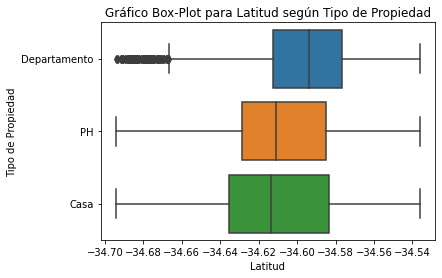

In [ ]:
sns.boxplot(data=df, x="latitud", y="property_type")
plt.title('Gráfico Box-Plot para Latitud según Tipo de Propiedad')
plt.xlabel('Latitud')
plt.ylabel('Tipo de Propiedad')
plt.show()

Notemos que no existen outliers detectados para PH y Casa, de modo que procedemos a analizar únicamente los Departamentos.

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [ ]:
print(f"Medidas para Latitud para Departamento:")

print_box_plot_medidas(df_depto.latitud)

Medidas para Latitud para Departamento:
El valor de Q1 es: -34.6125
El valor de Q3 es: -34.576380475
El limite inferior del Q1 es: -34.66667928749999
El limite superior del Q3 es: -34.5222011875


Veamos que la masa de observaciones detectadas como atípicas se encuentran consolidadas en un único grupo, de modo que no podríamos concluir que sean realmente valores atípicos.

###### Variable `longitud`

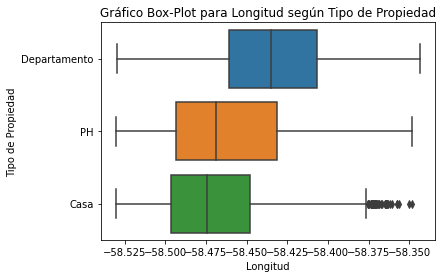

In [ ]:
sns.boxplot(data=df, x="longitud", y="property_type")
plt.title('Gráfico Box-Plot para Longitud según Tipo de Propiedad')
plt.xlabel('Longitud')
plt.ylabel('Tipo de Propiedad')
plt.show()

Notemos que no existen outliers detectados para Departamento y PH, de modo que procedemos a analizar únicamente Casas.

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Casa**

Visualizamos únicamente el Box Plot para Casa:

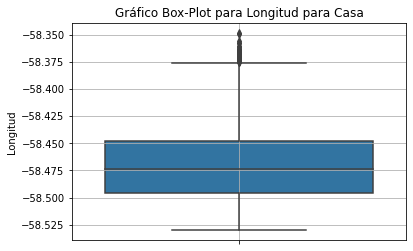

In [ ]:
sns.boxplot(data=df_casa, y="longitud")
plt.title('Gráfico Box-Plot para Longitud para Casa')
plt.ylabel('Longitud')
plt.grid()
plt.show()

In [ ]:
print(f"Medidas para Longitud para casa:")

print_box_plot_medidas(df_casa.longitud)

Medidas para Longitud para casa:
El valor de Q1 es: -58.496175
El valor de Q3 es: -58.4480496
El limite inferior del Q1 es: -58.568363100000006
El limite superior del Q3 es: -58.37586149999999


No podemos concluir que las observaciones detectadas sean outliers efectivamente puesto que se encuentran en agrupadas en un conjunto único de valores concentrados.

###### Variable `property_rooms`

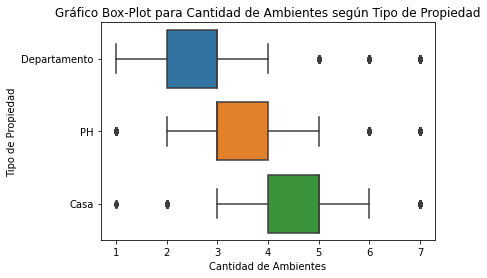

In [ ]:
sns.boxplot(data=df, x="property_rooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Ambientes según Tipo de Propiedad')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [ ]:
print(f"Medidas para Cantidad de Ambientes para Departamento:")

print_box_plot_medidas(df_depto.property_rooms)

Medidas para Cantidad de Ambientes para Departamento:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_depto[df_depto.property_rooms > 4.5].shape[0]

3601

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_depto[df_depto.property_rooms > 4.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 5.607% de los datos.


Debido al alto porcentaje de datos que representan, decidimos postergar la decisión del tratamiento de los mismos mediante un método que nos permita estudiar qué tipo de relación tiene la variable `property_rooms` con otras que puedan llegar a dar más información respecto al espacio disponible en la propiedad, como pueden ser `property_surface_total` o `property_surface_covered`.

**Casa**

In [ ]:
print(f"Medidas para Cantidad de Ambientes para Casa:")

print_box_plot_medidas(df_casa.property_rooms)

Medidas para Cantidad de Ambientes para Casa:
El valor de Q1 es: 4.0
El valor de Q3 es: 5.0
El limite inferior del Q1 es: 2.5
El limite superior del Q3 es: 6.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_casa[df_casa.property_rooms > 6.5].shape[0]

173

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_casa[df_casa.property_rooms > 6.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 6.284% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [ ]:
df_casa[df_casa.property_rooms < 2.5].shape[0]

42

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_casa[df_casa.property_rooms < 2.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.526% de los datos.


Nuevamente, debido al alto porcentaje que representan los outliers sobre el set de datos postergamos su tratamiento para comparar la variable con `property_surface_total` y `property_surface_covered`.

**PH**

In [ ]:
print(f"Medidas para Cantidad de Ambientes para PH:")

print_box_plot_medidas(df_ph.property_rooms)

Medidas para Cantidad de Ambientes para PH:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_ph[df_ph.property_rooms > 5.5].shape[0]

298

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_ph[df_ph.property_rooms > 5.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.086% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [ ]:
df_ph[df_ph.property_rooms < 1.5].shape[0]

147

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_ph[df_ph.property_rooms < 1.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.015% de los datos.


Nuevamente, postergamos el tratamiento de los outliers para comparar la variable con `property_surface_total` y `property_surface_covered`.

###### Variable `property_bedrooms`

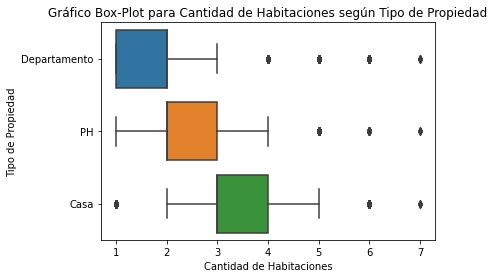

In [ ]:
sns.boxplot(data=df, x="property_bedrooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Habitaciones según Tipo de Propiedad')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [ ]:
print(f"Medidas para Cantidad de Habitaciones para Departamento:")

print_box_plot_medidas(df_depto.property_bedrooms)

Medidas para Cantidad de Habitaciones para Departamento:
El valor de Q1 es: 1.0
El valor de Q3 es: 2.0
El limite inferior del Q1 es: -0.5
El limite superior del Q3 es: 3.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_depto[df_depto.property_bedrooms > 3.5].shape[0]

2499

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_depto[df_depto.property_bedrooms > 3.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 3.891% de los datos.


Siguiendo con el razonamiento realizado para el tratamiento de la variable `property_rooms`, postergamos el análisis de los outliers detectados para visualizar cómo se comporta la misma en relación a variables de superficie.

**Casa**

In [ ]:
print(f"Medidas para Cantidad de Habitaciones para Casa:")

print_box_plot_medidas(df_casa.property_bedrooms)

Medidas para Cantidad de Habitaciones para Casa:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_casa[df_casa.property_bedrooms > 5.5].shape[0]

48

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_casa[df_casa.property_bedrooms > 5.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.744% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [ ]:
df_casa[df_casa.property_bedrooms < 1.5].shape[0]

57

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_casa[df_casa.property_bedrooms < 1.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.07% de los datos.


Nuevamente postergamos la reparacion para un análisis mas profundo.

**PH**

In [ ]:
print(f"Medidas para Cantidad de Habitaciones para PH:")

print_box_plot_medidas(df_ph.property_bedrooms)

Medidas para Cantidad de Habitaciones para PH:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [ ]:
df_ph[df_ph.property_bedrooms > 4.5].shape[0]

124

Analicemos qué porcentaje representan sobre el total de datos:

In [ ]:
pct = df_ph[df_ph.property_bedrooms > 4.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.7% de los datos.


Nuevamente, postergamos el análisis.

###### Variable `property_surface_total`

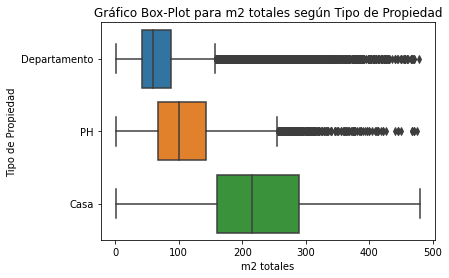

In [ ]:
sns.boxplot(data=df, x="property_surface_total", y="property_type")
plt.title('Gráfico Box-Plot para m2 totales según Tipo de Propiedad')
plt.xlabel('m2 totales')
plt.ylabel('Tipo de Propiedad')
plt.show()

Como se puede apreciar, en la variable property_surface_total tenemos una muy alta cantidad de valores que sobrepasan el límite superior del tercer cuartil, tanto para el tipo de propiedad Departamento, como para PH.

**Departamento**

In [ ]:
print(f"Medidas para m2 totales para Departamento:")

print_box_plot_medidas(df_depto.property_surface_total)

Medidas para m2 totales para Departamento:
El valor de Q1 es: 42.0
El valor de Q3 es: 88.0
El limite inferior del Q1 es: -27.0
El limite superior del Q3 es: 157.0


Notemos los valores superadores al limite del tercer cuartil

In [ ]:
df_depto[df_depto.property_surface_total > 157].shape[0]

4840

Y el porcentaje que representan sobre el total

In [ ]:
pct = df_depto[df_depto.property_surface_total > 157].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 7.536% de los datos.


Como se puede apreciar el el grafico, no contamos con la presencia de valores que sean menores al limite inferior del Q1.

**Casa**

In [ ]:
print(f"Medidas para m2 totales para Casa:")

print_box_plot_medidas(df_casa.property_surface_total)

Medidas para m2 totales para Casa:
El valor de Q1 es: 161.0
El valor de Q3 es: 290.0
El limite inferior del Q1 es: -32.5
El limite superior del Q3 es: 483.5


Tanto para la medida limite del Q1, como para la del Q3, no se detectan en el grafico valores que no cumplan con estar por fuera de los limites que establecen.

**PH**

In [ ]:
print(f"Medidas para m2 totales para PH:")

print_box_plot_medidas(df_ph.property_surface_total)

Medidas para m2 totales para PH:
El valor de Q1 es: 68.0
El valor de Q3 es: 143.0
El limite inferior del Q1 es: -44.5
El limite superior del Q3 es: 255.5


In [ ]:
df_ph[df_ph.property_surface_total > 255].shape[0]

292

In [ ]:
pct = df_ph[df_ph.property_surface_total > 255].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.003% de los datos.


Al igual que sucede con la variable departamento, si bien se ve claramente una gran masa de valores que no son esperados debido a que se encuentran una vez mas por encima del limite, teniendo en cuenta la tan fuerte presencia de estos, consideramos que el metodo utilizado en este analisis no es suficiente para poder llegar a una caracterizacion solida. No podemos afirmar que todos estos valores son atipicos. 

Puntualmente en esta variable vemos muy importante el realizar un estudio mas exhaustivo utilizando otro metodo y variable a correlacionar.

Una vez mas se puede apreciar la importancia de subdividir de acuerdo con el tipo de propiedad, ya que las medidas obtenidas para cada uno de estos son notablemente diferentes.

###### Variable `property_surface_covered`

A continuacion estudiaremos el grafico de Box-Plot para la ultima variable a analizar.

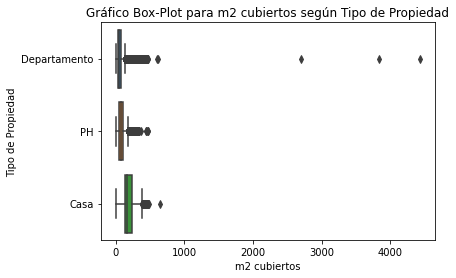

In [ ]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

**Casa**

In [ ]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


Contabilizando las observaciones correspondientes superadoras al limite superior de Q3 obtenemos

In [ ]:
df_casa[df_casa.property_surface_covered > 383].shape[0]

64

Las cuales representan un porcentaje de

In [ ]:
pct = df_casa[df_casa.property_surface_covered > 383].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.325% de los datos.


Dado que el porcentaje de ambos extremos supera el limite que establecimos inicialmente como condicion, los dejamos para continuar su analisis.

**PH**

In [ ]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


Contabilizando nuevamente obtenemos la siguiente cantidad

In [ ]:
df_ph[df_ph.property_surface_covered > 177.5].shape[0]

307

La cual representa

In [ ]:
pct = df_ph[df_ph.property_surface_covered > 177.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.209% de los datos.


Dado que representan un porcentaje significativo, postergamos la limpieza.

**Departamento**

In [ ]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


A diferencia de los graficos previos, en esta variable en particular se puede apreciar tres valores puntualmente alejados del resto de la masa.

In [ ]:
df_depto[df_depto.property_surface_covered > 1000]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
30359,rpeGyTLDvloNDFf/CSF6Aw==,738078,738182,738078,-34.620935,-58.374850,Capital Federal,San Telmo,San Telmo,NaN,NaN,Venta,Departamento,2.0,1.0,48.0,4435.0,93500.0,USD,Dptos 2 amb a estrenar en San Telmo!!!
438160,mzH1lMHi7l9z9MTU0eMRVg==,738090,738159,738090,-34.630704,-58.400901,Capital Federal,Parque Patricios,Parque Patricios,NaN,NaN,Venta,Departamento,1.0,1.0,31.0,2700.0,71500.0,USD,"DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES, B..."
354376,oSruKb4+uOYztGpv3h5FKA==,738098,738182,738098,-34.579394,-58.453519,Capital Federal,Colegiales,Colegiales,NaN,NaN,Venta,Departamento,3.0,2.0,41.0,3837.0,83000.0,USD,Departamento - Colegiales


Determinamos esta como una razon suficiente para eliminarlos del dataset, y procedemos a corregirlo en nuestro dataset de train.

In [ ]:
df_depto.drop(df[df.property_surface_covered > 1000].index, inplace=True)
df.drop(df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')].index, inplace=True)

Validamos que se hayan aplicado los cambios.

In [ ]:
df_depto.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title


In [ ]:
df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title


A continuacion volveremos a hacer un analisis sobre el grafico Box-Plot para estudiar como cambio su comportamiento

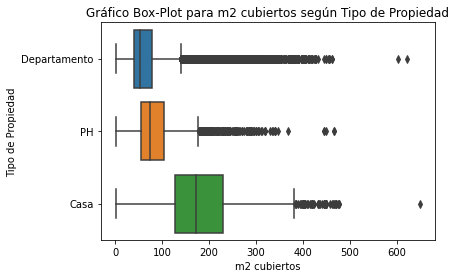

In [ ]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

Las medidas obtenidas fueron las siguientes:

In [ ]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


In [ ]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


In [ ]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


Como era de esperarse, obtuvimos registros mayores al limite superior en cada uno de los casos. Si bien nuevamente contamos con algunos valores que estan definidamente separados de los demas, esta vez no resultan alejados por una distancia tan significativa como los anteriores.

Los notamos como posibles candidatos a ser outliers, para confirmar luego de un analisis mas profundo.

##### Técnica Mahalanobis

Para continuar el análisis multivariado de outliers estaremos utilizando el método de Mahalanobis el cual nos brinda información respecto de la distancia de las observaciones agrupando las similares en clusters, evidenciando así los puntos aislados que pasaremos a considerar como valores atípicos. Para ello, realizaremos un scatter plot para cada par de variables de interés:

###### property_rooms vs property_surface_total

Realizamos un análisis multivariado entre las variables `property_rooms` y `property_surface_total` agrupando por tipo de propiedad. La idea es estudiar la relación entre la cantidad de ambientes y la superficie total tanto cubierta como descubierta de una propiedad debido a que nos resulta más razonable -ante la comparación contra `property_surface_covered`- pues queremos tener en consideración cuartos que podrían encontrarse al descubierto (ej: lavaderos, quinchos, garage, etc.).

**Departamento**

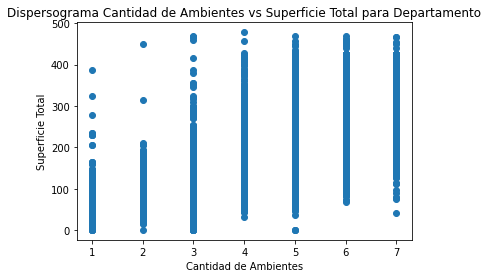

In [ ]:
plt.scatter(df_depto.property_rooms, df_depto.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Como podemos apreciar en el dispersograma que obtuvimos arriba, tenemos algunas pocas observaciones que se encuentran aisladas de la concentracion principal. En particular, las que se corresponden a una pequeña cantidad de ambientes pero en una amplia superficie. Si bien esto es algo que es posible, no es del todo esperado. 

Procedemos a analizarlos en detalle utilizando la distancia de Mahalanobis.

In [ ]:
X = df_depto[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_depto['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_depto.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st
92828,1gMQ4rXcpnPs+hhvW11Jdw==,738005,738091,738005,-34.622385,-58.448886,Capital Federal,Caballito,Caballito,NaN,...,Venta,Departamento,4.0,3.0,113.0,97.0,288000.0,USD,"Vta. Dpto. 4amb, Caballito, balcón aterrazado ...",1.506958
19975,p7gmyqzdOy/+odHwH5oPyg==,737817,737946,737817,-34.618084,-58.359912,Capital Federal,Puerto Madero,Puerto Madero,NaN,...,Venta,Departamento,2.0,1.0,70.0,65.0,450000.0,USD,Departamento con Cochera en Puerto Madero,0.447600
266756,ZYkS+4dCz1vUENzAREcX9w==,738035,738035,738035,-34.601159,-58.398106,Capital Federal,Balvanera,Balvanera,NaN,...,Venta,Departamento,1.0,1.0,33.0,30.0,77243.0,USD,VENTA MONOAMBIENTE BALVANERA ZONA FACULTADES,2.013894
454638,UL/s8zoicLDXXwhaelBgFQ==,738140,738195,738140,-34.605542,-58.390007,Capital Federal,San Nicolás,San Nicolás,NaN,...,Venta,Departamento,1.0,1.0,30.0,30.0,65000.0,USD,DEPTO 1 AMBIENTE Y MEDIO C/ COCHERA - SAN NICOLAS,1.960491
409114,wnz+hkCE7RVBNcqDQEtFSw==,737868,737946,737868,-34.593266,-58.381426,Capital Federal,Retiro,Retiro,NaN,...,Venta,Departamento,1.0,1.0,40.0,40.0,79000.0,USD,Departamento - Retiro,2.192237


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

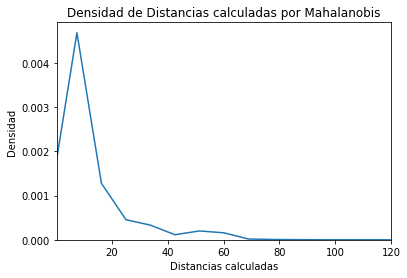

In [ ]:
dis = round(df_depto.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

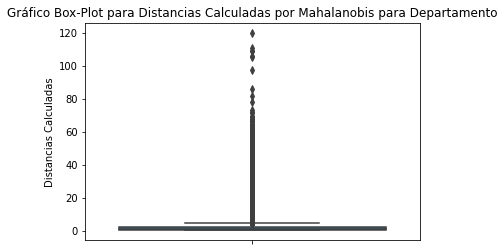

In [ ]:
sns.boxplot(data=df_depto, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Departamento')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 80 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

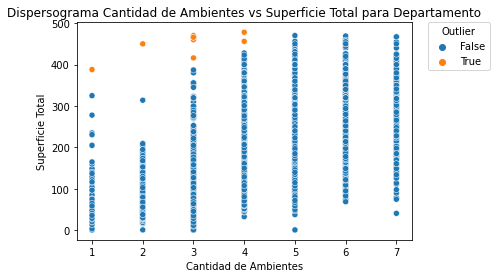

In [ ]:
umbral=80
df_depto[df_depto['mahal_ro_st']>umbral]

es_outlier = (df_depto['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_depto.property_rooms,y=df_depto.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Evaluamos el porcentaje que representan en el total de las mediciones

In [ ]:
pct = df_depto[df_depto['mahal_ro_st']>umbral].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.014% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [ ]:
out_indixes = df_depto[df_depto['mahal_ro_st']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_depto.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_depto[df_depto['mahal_ro_st'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st


**Casa**

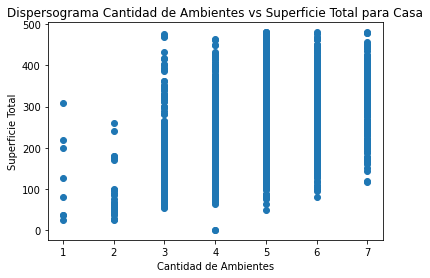

In [ ]:
plt.scatter(df_casa.property_rooms, df_casa.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Casa')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Lo que se puede apreciar en este nuevo dispersograma, es que para una propiedad de tipo Casa la cantidad de ambientes tiende a ser mayor. Esto tiene sentido ya que como podemos ver disponemos de una gran superficie.

Se pueden observar algunos valores aislados, aunque no nos llaman debidamente la atencion dado a que es coherente que a menor cantidad de ambientes, la superficie sea mas chica.

Calculamos distancias para este tipo de propiedad

In [ ]:
X = df_casa[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_casa['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_casa.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st
387643,MGM2azMohIovCwT8jcExeQ==,737879,737907,737879,-34.612009,-58.475824,Capital Federal,Villa del Parque,Villa del Parque,NaN,...,Venta,Casa,5.0,4.0,320.0,250.0,450000.0,USD,VENTA CASA 4 AMB JARDÍN Y PILETA VILLA DEL PARQUE,0.710971
74909,R21ZaT3P51jKsOJCPlhDsA==,737814,737906,737814,-34.631631,-58.524970,Capital Federal,Versalles,Versalles,NaN,...,Venta,Casa,3.0,2.0,137.0,137.0,198000.0,USD,Casa - Versalles,2.169723
424845,5PfALVXCKBuTj0wT2l0DxA==,738140,738182,738140,-34.643476,-58.463102,Capital Federal,Flores,Flores,NaN,...,Venta,Casa,5.0,4.0,238.0,238.0,189000.0,USD,CASA • LOTE PROPIO • 5 AMBIENTES • FLORES,0.210272
431951,Ct6qgnyItKneV7vn3cdW2Q==,738140,738195,738140,-34.628101,-58.500728,Capital Federal,Velez Sarsfield,Velez Sarsfield,NaN,...,Venta,Casa,4.0,3.0,345.0,310.0,299000.0,USD,Casa 4 ambientes con deposito o local. Patio,2.241258
446712,vJ8qWviFe3331GWPM9bigg==,737804,737822,737804,-34.576798,-58.470496,Capital Federal,Villa Ortuzar,Villa Ortuzar,NaN,...,Venta,Casa,4.0,3.0,195.0,195.0,385000.0,USD,Casa en venta en 1 planta de 4 ambientes en lo...,0.293463


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

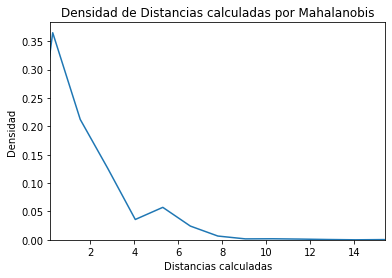

In [ ]:
dis = round(df_casa.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

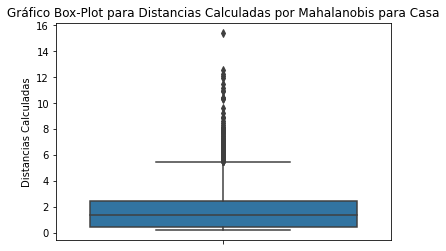

In [ ]:
sns.boxplot(data=df_casa, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Casa')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 13 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

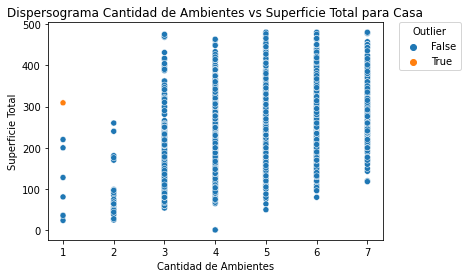

In [ ]:
umbral = 13
df_casa[df_casa['mahal_ro_st']>umbral]

es_outlier = (df_casa['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_casa.property_rooms,y=df_casa.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Casa')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Volvemos a evaluar el porcentaje que representan sobre la totalidad de los datos de este tipo de propiedad

In [ ]:
pct = df_casa[df_casa['mahal_ro_st']>umbral].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.036% de los datos.


Y notamos que representan una porcion muy pequeña de nuestro dataset de trabajo. Procedemos a eliminarlo del mismo.

In [ ]:
out_indixes = df_casa[df_casa['mahal_ro_st']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_casa.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_casa[df_casa['mahal_ro_st'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st


**PH**

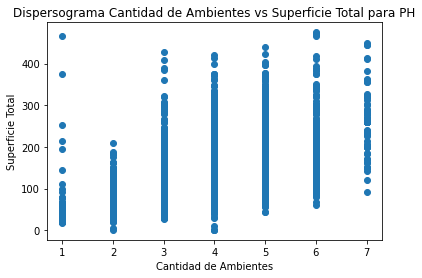

In [ ]:
plt.scatter(df_ph.property_rooms, df_ph.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para PH')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Notemos que, a priori, resultarían extrañas las observaciones detecadas soperiores a 300 para 1 ambiente.

Procedemos a realizar un análisis más detallado utilizando la distancia de Mahalanobis:

In [ ]:
X = df_ph[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_ph['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_ph.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st
241652,+QvrIZqpMPRxlz+ilj1LkA==,737881,737965,737881,-34.564779,-58.505463,Capital Federal,Villa Urquiza,Villa Urquiza,NaN,...,Venta,PH,6.0,3.0,184.0,124.0,350000.0,USD,PH 5 ambientes en Villa Urquiza,6.427976
171763,lptqhc6hgKrEGJtImFZCJw==,738144,738195,738144,-34.612921,-58.394416,Capital Federal,Balvanera,Balvanera,NaN,...,Venta,PH,3.0,2.0,58.0,55.0,80000.0,USD,Departamento Ph 3 ambientes en venta en Balvan...,0.918918
266776,T1g0pGYdDflgb2YLc6rCKQ==,738035,738035,738035,-34.616105,-58.430122,Capital Federal,Caballito,Caballito,NaN,...,Venta,PH,5.0,4.0,330.0,270.0,499000.0,USD,Casa - Venta - Caballito - 5 ambientes,13.188770
253247,GEuOGLrdHvMtWuu1x/yLZw==,738022,738025,738022,-34.616064,-58.508264,Capital Federal,Monte Castro,Monte Castro,NaN,...,Venta,PH,3.0,2.0,106.0,82.0,109900.0,USD,Venta PH PB 3 amb. Patio y Terraza - MonteCastro,0.126627
184244,nu2t5qPbGteGdxni3yPQlg==,737947,738160,737947,-34.612897,-58.446416,Capital Federal,Caballito,Caballito,NaN,...,Venta,PH,4.0,3.0,153.0,95.0,165000.0,USD,PH - Caballito,0.440472


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

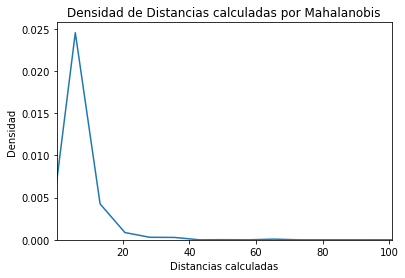

In [ ]:
dis = round(df_ph.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

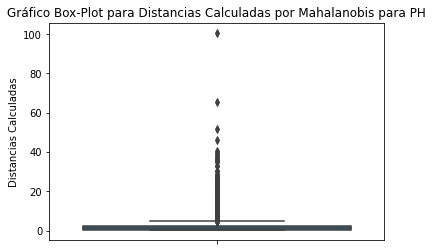

In [ ]:
sns.boxplot(data=df_ph, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para PH')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 50 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

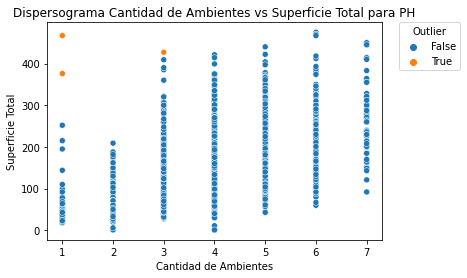

In [ ]:
umbral = 50
df_ph[df_ph['mahal_ro_st']>umbral]

es_outlier = (df_ph['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_ph.property_rooms,y=df_ph.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para PH')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Efectivamente, los valores detectados en un comienzo son outliers para Mahalanobis.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [ ]:
pct = df_ph[df_ph['mahal_ro_st']>umbral].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.041% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [ ]:
out_indixes = df_ph[df_ph['mahal_ro_st']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_ph.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_ph[df_ph['mahal_ro_st'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st


###### property_bedrooms vs property_surface_covered

Siguiendo con la comparación anterior, en esta sección estaremos realizando un análisis multivariado entre las variables `property_bedrooms` y `property_surface_covered` agrupando por tipo de propiedad con el objeto de poder detectar observaciones anómalas teniendo en cuenta la cantidad de habitaciones que pueda llegar a haber en una propiedad según la superficie cubierta de la misma. Es importante destacar que, a diferencia del análisis previo, en esta ocasión únicamente nos centraremos en aquellas instalaciones cerradas al exterior.

**Departamento**

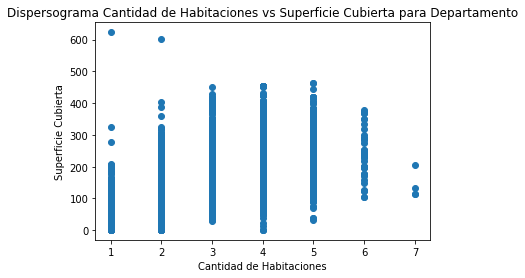

In [ ]:
plt.scatter(df_depto.property_bedrooms, df_depto.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Departamento')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Veamos que podríamos clasificar los valores alejados de la masa de observaciones para 1 y 2 habitaciones como outliers. Ahora bien, utilicemos Mahalanobis para consolidar esta teoría y tomar una decisión respecto a los mismos e incluso encontrar nuevos valores atípicos en caso que los hubiera.

In [ ]:
X = df_depto[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_depto['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_depto.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc
92828,1gMQ4rXcpnPs+hhvW11Jdw==,738005,738091,738005,-34.622385,-58.448886,Capital Federal,Caballito,Caballito,NaN,...,Departamento,4.0,3.0,113.0,97.0,288000.0,USD,"Vta. Dpto. 4amb, Caballito, balcón aterrazado ...",1.506958,2.525309
19975,p7gmyqzdOy/+odHwH5oPyg==,737817,737946,737817,-34.618084,-58.359912,Capital Federal,Puerto Madero,Puerto Madero,NaN,...,Departamento,2.0,1.0,70.0,65.0,450000.0,USD,Departamento con Cochera en Puerto Madero,0.447600,1.409996
266756,ZYkS+4dCz1vUENzAREcX9w==,738035,738035,738035,-34.601159,-58.398106,Capital Federal,Balvanera,Balvanera,NaN,...,Departamento,1.0,1.0,33.0,30.0,77243.0,USD,VENTA MONOAMBIENTE BALVANERA ZONA FACULTADES,2.013894,0.780995
454638,UL/s8zoicLDXXwhaelBgFQ==,738140,738195,738140,-34.605542,-58.390007,Capital Federal,San Nicolás,San Nicolás,NaN,...,Departamento,1.0,1.0,30.0,30.0,65000.0,USD,DEPTO 1 AMBIENTE Y MEDIO C/ COCHERA - SAN NICOLAS,1.960491,0.780995
409114,wnz+hkCE7RVBNcqDQEtFSw==,737868,737946,737868,-34.593266,-58.381426,Capital Federal,Retiro,Retiro,NaN,...,Departamento,1.0,1.0,40.0,40.0,79000.0,USD,Departamento - Retiro,2.192237,0.732656


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

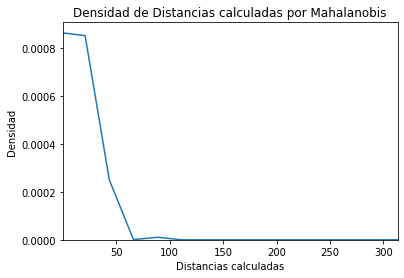

In [ ]:
dis = round(df_depto.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

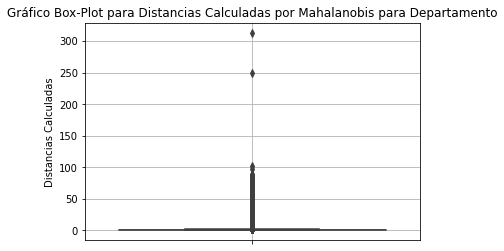

In [ ]:
sns.boxplot(data=df_depto, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Departamento')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 150 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

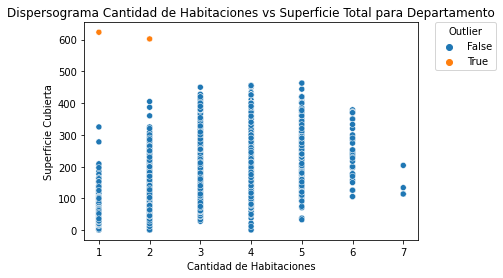

In [ ]:
umbral = 150
df_depto[df_depto['mahal_br_sc']>umbral]

es_outlier = (df_depto['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_depto.property_bedrooms,y=df_depto.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Efectivamente los valores que parecían outliers fueron detectados por el método.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [ ]:
pct = df_depto[df_depto['mahal_br_sc']>umbral].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.003% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [ ]:
out_indixes = df_depto[df_depto['mahal_br_sc']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_depto.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_depto[df_depto['mahal_br_sc'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc


**Casa**

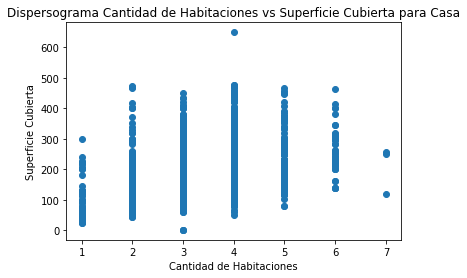

In [ ]:
plt.scatter(df_casa.property_bedrooms, df_casa.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Casa')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Podríamos pensar que el método detectará como outlier el valor global que se encuentra alejado de la masa de observaciones para 4 habitaciones.

Calculamos distancias:

In [ ]:
X = df_casa[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_casa['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_casa.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc
387643,MGM2azMohIovCwT8jcExeQ==,737879,737907,737879,-34.612009,-58.475824,Capital Federal,Villa del Parque,Villa del Parque,NaN,...,Casa,5.0,4.0,320.0,250.0,450000.0,USD,VENTA CASA 4 AMB JARDÍN Y PILETA VILLA DEL PARQUE,0.710971,1.015376
74909,R21ZaT3P51jKsOJCPlhDsA==,737814,737906,737814,-34.631631,-58.524970,Capital Federal,Versalles,Versalles,NaN,...,Casa,3.0,2.0,137.0,137.0,198000.0,USD,Casa - Versalles,2.169723,1.699019
424845,5PfALVXCKBuTj0wT2l0DxA==,738140,738182,738140,-34.643476,-58.463102,Capital Federal,Flores,Flores,NaN,...,Casa,5.0,4.0,238.0,238.0,189000.0,USD,CASA • LOTE PROPIO • 5 AMBIENTES • FLORES,0.210272,0.845419
431951,Ct6qgnyItKneV7vn3cdW2Q==,738140,738195,738140,-34.628101,-58.500728,Capital Federal,Velez Sarsfield,Velez Sarsfield,NaN,...,Casa,4.0,3.0,345.0,310.0,299000.0,USD,Casa 4 ambientes con deposito o local. Patio,2.241258,3.397322
446712,vJ8qWviFe3331GWPM9bigg==,737804,737822,737804,-34.576798,-58.470496,Capital Federal,Villa Ortuzar,Villa Ortuzar,NaN,...,Casa,4.0,3.0,195.0,195.0,385000.0,USD,Casa en venta en 1 planta de 4 ambientes en lo...,0.293463,0.128861


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

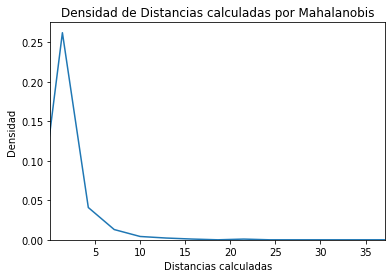

In [ ]:
dis = round(df_casa.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

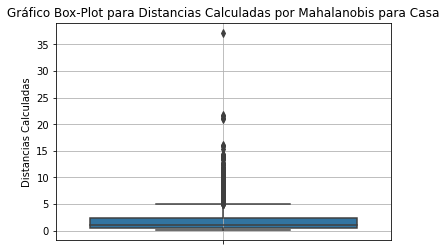

In [ ]:
sns.boxplot(data=df_casa, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Casa')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 20 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

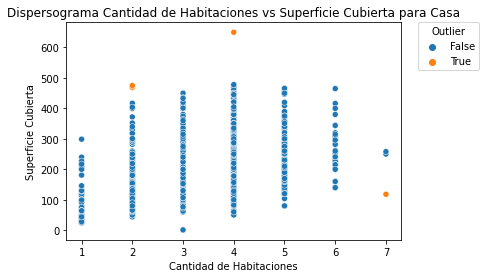

In [ ]:
umbral = 20
df_casa[df_casa['mahal_br_sc']>umbral]

es_outlier = (df_casa['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_casa.property_bedrooms,y=df_casa.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Casa')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Volvemos a evaluar el porcentaje que representan sobre la totalidad de los datos de este tipo de propiedad

In [ ]:
pct = df_casa[df_casa['mahal_br_sc']>umbral].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.182% de los datos.


Y notamos que representan una porcion muy pequeña de nuestro dataset de trabajo. Procedemos a eliminarlo del mismo.

In [ ]:
out_indixes = df_casa[df_casa['mahal_br_sc']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_casa.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_casa[df_casa['mahal_br_sc'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc


**PH**

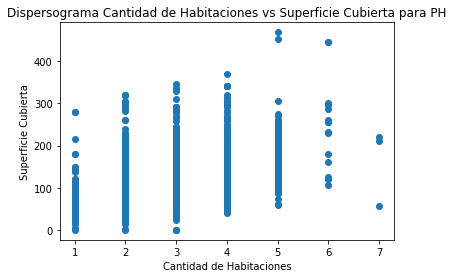

In [ ]:
plt.scatter(df_ph.property_bedrooms, df_ph.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para PH')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Podríamos identitifcar como outliers los valores globales que se visualizan para 5, 6 y 7 cantidad de habitaciones. Veamos cómo resulta el cálculo de distancias de Mahalanobis:

In [ ]:
X = df_ph[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_ph['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_ph.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc
241652,+QvrIZqpMPRxlz+ilj1LkA==,737881,737965,737881,-34.564779,-58.505463,Capital Federal,Villa Urquiza,Villa Urquiza,NaN,...,PH,6.0,3.0,184.0,124.0,350000.0,USD,PH 5 ambientes en Villa Urquiza,6.427976,1.019754
171763,lptqhc6hgKrEGJtImFZCJw==,738144,738195,738144,-34.612921,-58.394416,Capital Federal,Balvanera,Balvanera,NaN,...,PH,3.0,2.0,58.0,55.0,80000.0,USD,Departamento Ph 3 ambientes en venta en Balvan...,0.918918,0.647481
266776,T1g0pGYdDflgb2YLc6rCKQ==,738035,738035,738035,-34.616105,-58.430122,Capital Federal,Caballito,Caballito,NaN,...,PH,5.0,4.0,330.0,270.0,499000.0,USD,Casa - Venta - Caballito - 5 ambientes,13.188770,25.060608
253247,GEuOGLrdHvMtWuu1x/yLZw==,738022,738025,738022,-34.616064,-58.508264,Capital Federal,Monte Castro,Monte Castro,NaN,...,PH,3.0,2.0,106.0,82.0,109900.0,USD,Venta PH PB 3 amb. Patio y Terraza - MonteCastro,0.126627,0.103555
184244,nu2t5qPbGteGdxni3yPQlg==,737947,738160,737947,-34.612897,-58.446416,Capital Federal,Caballito,Caballito,NaN,...,PH,4.0,3.0,153.0,95.0,165000.0,USD,PH - Caballito,0.440472,0.887842


Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

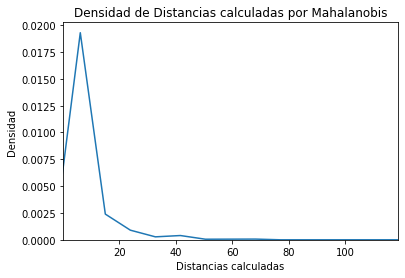

In [ ]:
dis = round(df_ph.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")
plt.show()

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

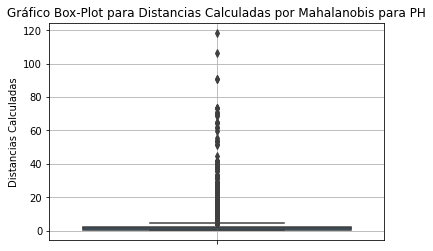

In [ ]:
sns.boxplot(data=df_ph, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para PH')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 80 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

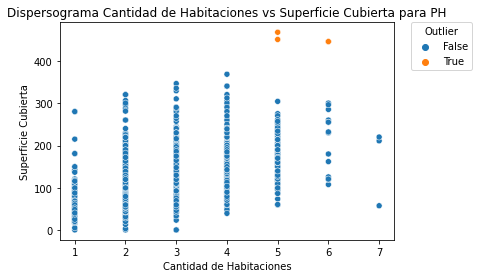

In [ ]:
umbral = 80
df_ph[df_ph['mahal_br_sc']>umbral]

es_outlier = (df_ph['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_ph.property_bedrooms,y=df_ph.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para PH')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Por el contrario que en los análisis previos, en esta ocasión Mahalanobis no detectó como outliers los que planteamos en un principio.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [ ]:
pct = df_ph[df_ph['mahal_br_sc']>umbral].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.055% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [ ]:
out_indixes = df_ph[df_ph['mahal_br_sc']>umbral].index

In [ ]:
df.drop(out_indixes, inplace=True)
df_ph.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [ ]:
df_ph[df_ph['mahal_br_sc'] > umbral]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,mahal_ro_st,mahal_br_sc


## 1d. Reducción de la dimensionalidad

Generamos un nuevo dataset de reducción de dimensionalidad:

In [ ]:
df_reduc = df.copy()

Revisamos la totalidad de columnas hasta el momento:

In [ ]:
df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Variables Irrelevantes

En primer lugar, nos encargamos de eliminar aquellas variables que previamente detectamos como redundantes:

In [ ]:
df_reduc.drop("id", inplace=True, axis=1)
df_reduc.drop("place_l2", inplace=True, axis=1)
df_reduc.drop("place_l3", inplace=True, axis=1)
df_reduc.drop("place_l5", inplace=True, axis=1)
df_reduc.drop("place_l6", inplace=True, axis=1)
df_reduc.drop("operation", inplace=True, axis=1)
df_reduc.drop("property_currency", inplace=True, axis=1)
df_reduc.drop("property_title", inplace=True, axis=1)
df_reduc.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price']

### Variables Correlacionadas

Estudiamos la correlación entre las variables del dataset con el objeto de analizar si es óptimo o no tener un par de variables que tengan un alto nivel de correlación. Establecemos como umbral 0.85:

In [ ]:
df_reduc.corr().style.background_gradient(cmap='YlOrRd')

,start_date,end_date,created_on,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
start_date,1.000000,0.611012,1.000000,-0.002692,-0.008249,0.000612,0.000005,-0.002421,-0.008739,-0.037357
end_date,0.611012,1.000000,0.611012,-0.012939,0.014452,0.002825,0.005542,0.005920,0.006541,-0.009670
created_on,1.000000,0.611012,1.000000,-0.002692,-0.008249,0.000612,0.000005,-0.002421,-0.008739,-0.037357
latitud,-0.002692,-0.012939,-0.002692,1.000000,-0.146689,-0.025852,-0.024531,0.017221,0.038675,0.167640
longitud,-0.008249,0.014452,-0.008249,-0.146689,1.000000,-0.004765,-0.004638,-0.015907,0.043064,0.126311
property_rooms,0.000612,0.002825,0.000612,-0.025852,-0.004765,1.000000,0.923316,0.762568,0.771410,0.509740
property_bedrooms,0.000005,0.005542,0.000005,-0.024531,-0.004638,0.923316,1.000000,0.741452,0.750584,0.488592
property_surface_total,-0.002421,0.005920,-0.002421,0.017221,-0.015907,0.762568,0.741452,1.000000,0.947434,0.708108
property_surface_covered,-0.008739,0.006541,-0.008739,0.038675,0.043064,0.771410,0.750584,0.947434,1.000000,0.764672
property_price,-0.037357,-0.009670,-0.037357,0.167640,0.126311,0.509740,0.488592,0.708108,0.764672,1.000000


Veamos que hay una correlación alta entre:
- `start_date` y `created_on`
- `property_rooms` y `property_bedrooms`
- `property_surface_total` y `property_surface_covered`

Proseguimos a eliminar una de cada par:

In [ ]:
df_reduc.drop("created_on", inplace=True, axis=1)
df_reduc.drop("property_bedrooms", inplace=True, axis=1)
df_reduc.drop("property_surface_covered", inplace=True, axis=1)

### Variables con Baja Varianza

In [ ]:
df_reduc.var().sort_values()

latitud                   6.929534e-04
longitud                  1.436418e-03
property_rooms            1.571097e+00
property_surface_total    4.263687e+03
start_date                1.071335e+04
end_date                  2.294168e+04
property_price            6.567835e+10
dtype: float64

Veamos que las variables `latitud` y `longitud` tienen varianzas muy bajas y son candidatas a ser eliminadas del dataset. Sin embargo, decidimos dejarlas puesto que las utilizaremos más adelante para graficar los mapas de agrupamiento.

### Exportación de Datos

Puesto que las variables restantes en el dataset son de utilidad para el análisis pendiente restante del trabajo práctico, no aplicamos más métodos de reducción.

Finalmente, las columnas del dataset reducido son las siguientes:

In [ ]:
df_reduc.columns.tolist()

['start_date',
 'end_date',
 'latitud',
 'longitud',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_surface_total',
 'property_price']

Verificamos que el dataset de test contenga las mismas columnas:

In [ ]:
df_reduc.columns.tolist() == test.columns.tolist()

False

Exportamos el dataset generado luego de aplicar la reduccion de la dimensionalidad:

In [ ]:
df_reduc.to_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/1d_df_reducido.csv')

#  **2. Agrupamiento**

## Tendencia al Clustering
Primero generamos datasets de trabajo con *One Hot Encoding*

In [ ]:
# df_trabajo = pd.get_dummies(df, columns=['place_l4', 'property_type'], drop_first=True)
# df_trabajo_reduc = pd.get_dummies(df_reduc, columns=['place_l4', 'property_type'], drop_first=True)

Luego realizamos un análisis de Hopkins para determinar la tendencia al clustering de todo el dataset

In [ ]:
# print ("El score de Hopkins para el Dataframe es " + str(hopkins(df_trabajo, df_trabajo.shape[0])))
# print ("El score de Hopkins para el Dataframe reducido es " + str(hopkins(df_trabajo_reduc, df_trabajo_reduc.shape[0])))

Al ser un valor muy cercano a 0, podemos concluir que la distribución tiende a la uniformidad y no habrá clustering.

Aplicamos el algoritmo K-means contemplando todas las variables:


In [ ]:
# sse = []
# list_k = list(range(2, 10))

# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(df_trabajo)
#     sse.append(km.inertia_)

# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()

Aunque no se nota un "codo" en el análisis por método del codo, utilizamos 5 clusters siendo que el mayor decremento en la distancia media al centroide:

In [ ]:
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(df_trabajo)
# y_kmeans = kmeans.predict(df_trabajo)
# print ("Silhouette Score para 5 clusters = " + str(silhouette_score(df_trabajo, y_kmeans)))

Observamos que el score es mayor a 0, pero no muy cercano a 1. Esto tiende a indicar que aunque los puntos están bien asignados a su cluster (mayor a 0), los clusters no están bien definidos y están muy cerca entre sí (no muy cerca de 1)

Graficamos los resultados en un mapa de CABA:

In [ ]:
# if IN_COLAB :
#     caba = gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson')
# else :
#     caba = gpd.read_file('./caba.geojson')

# caba.plot(cmap='cubehelix', alpha=0.5).set_title('Distribución de la clasificación según K-means sobre un mapa de la ciudad de Buenos Aires')
# sns.scatterplot(x="longitud",
#                 y="latitud",
#                 s=10,
#                 hue=y_kmeans,
#                 data=df_trabajo,
#                 palette="deep")
# plt.xlabel("latitud")
# plt.ylabel("longitud")
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# plt.show()

Realizamos el mismo análisis sobre el dataset con variables reducidas

In [ ]:
# sse = []
# list_k = list(range(2, 10))

# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(df_trabajo_reduc)
#     sse.append(km.inertia_)

# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()

A diferencia del punto anterior, utilizamos 3 clusters:

In [ ]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df_trabajo_reduc)
# y_kmeans = kmeans.predict(df_trabajo_reduc)
# print ("Silhouette Score para 5 clusters = " + str(silhouette_score(df_trabajo_reduc, y_kmeans)))

Siendo que Silhouette da un peor resultado que el punto anterior, descartamos esta opción.

Realizamos el mismo análisis utilizando 3 clusters:

In [ ]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df_trabajo)
# y_kmeans = kmeans.predict(df_trabajo)
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)
#
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5,marker='.')
# plt.show()
#
# print ("Silhouette Score para 3 clusters = " + str(silhouette_score(df_trabajo, y_kmeans)))

Viendo la curva de cantidad de clusters contra la distancia media al centroide (SSE) podemos ver que no existen clusters definidos, no se ve un claro codo en el cual elegir un numero de clusters ideal. No existen agrupamientos definidos.

Un segundo análisis que decidimos realizar es si existe clustering entre tres variables: longitud, latitud y precio. Obtuvimos los mismos resultados que el caso anterior:

In [ ]:
# X = df.loc[:,["longitud","latitud","property_price"]].values
#
# sse = []
# list_k = list(range(2, 10))
#
# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(X)
#     sse.append(km.inertia_)
#
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()
#
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(projection='3d')
#
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
#
# centers = kmeans.cluster_centers_
# ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=0.2)
# ax.scatter(centers[:,0], centers[:,1], centers[:,2], c="red", s=500, marker="o")

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1)

Como no obtuvimos un clustering definido, buscamos ver si existía un agrupamiento entre ubicación geográfica y precio por metro cuadrado. Los resultados fueron similares.

In [ ]:
df["property_m2price"] = df["property_price"] / df["property_surface_total"]
# X = df.loc[:,["longitud","latitud", "property_m2price"]].loc[(df.property_m2price < 5000)].values
# sse = []
# sscore = []
# list_k = list(range(2, 10))
#
# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(X)
#     y_kmeans = km.predict(X)
#     sse.append(km.inertia_)
#     sscore.append(silhouette_score(X, y_kmeans))
#
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(projection='3d')
#
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=5)

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1)

In [ ]:
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sscore, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

In [ ]:
# X = df.iloc[:,[15,13]].values
#
# sse = []
# list_k = list(range(2, 10))
#
# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(X)
#     sse.append(km.inertia_)
#
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()
#
# kmeans = KMeans(n_clusters=5, max_iter=900)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)
#
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
# plt.show()

In [ ]:
# X = df.loc[:,['property_rooms','property_m2price']].loc[df.property_rooms.notna()].values
#
# sse = []
# list_k = list(range(2, 10))
#
# for k in list_k:
#    km = KMeans(n_clusters=k)
#    km.fit(X)
#    sse.append(km.inertia_)
#
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Cantidad de clusters')
# plt.ylabel('SSE')
# plt.show()
#
# kmeans = KMeans(n_clusters=5, max_iter=900)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)
#
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
# plt.show()

#  **3. Clasificación**

#  **4. Regresión**

En esta última parte del trabajo, buscaremos predecir el precio de la propiedad (variable `property_price`) utilizando los modelos

- KNN
- XGBoost
- Adaboost

Definimos una función para la impresión de métricas:

In [ ]:
def performance_y_metricas(regressor, x_test, y_train, y_test):
  
  y_pred = regressor.predict(x_test)

  performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
  performance.head(10)
  
  pct = np.sum(y_test.values == y_pred) / len(y_test) * 100

  print(f"Se obtuvo un {round(pct,3)}% de aciertos.")

  mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

  print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

  rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

  print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

  print(f"El score obtenido es es: {regressor.score(x_test, y_test)}")

  return y_pred

In [ ]:
def random_cv_hyper_param_optimization(n, f, regressor, params, x_train, y_train):

  randomcv = RandomizedSearchCV(estimator = regressor,
                                param_distributions = params_grid,
                                scoring = make_scorer(sk.metrics.accuracy_score),
                                cv = StratifiedKFold(n_splits = f),
                                n_iter = n) 

  randomcv.fit(x_train, y_train)

  return randomcv

## Preparación de los DataSets

Realizamos las tareas de featuring correspondientes para poder entrenar los modelos según los requerimientos de cada modelo:

Hacemos una copia de los dataset de entrenamiento y testing para realizar la tarea de encoding:

In [ ]:
le = LabelEncoder()

df_encoded = df.copy()
df_reduc_encoded = df_reduc.copy()
test_encoded = test.copy()

Transformamos las variables categóricas:

In [ ]:
df_encoded['place_l2'] = le.fit_transform(df['place_l2'].astype(str))
df_encoded['place_l3'] = le.fit_transform(df['place_l3'].astype(str))
df_encoded['place_l4'] = le.fit_transform(df['place_l4'].astype(str))
df_encoded['place_l5'] = le.fit_transform(df['place_l5'].astype(str))
df_encoded['place_l6'] = le.fit_transform(df['place_l6'].astype(str))
df_encoded['operation'] = le.fit_transform(df['operation'].astype(str))
df_encoded['property_type'] = le.fit_transform(df['property_type'].astype(str))

In [ ]:
df_reduc_encoded['place_l4'] = le.fit_transform(df_reduc['place_l4'].astype(str))
df_reduc_encoded['property_type'] = le.fit_transform(df_reduc['property_type'].astype(str))

In [ ]:
test_encoded['place_l2'] = le.fit_transform(test['place_l2'].astype(str))
test_encoded['place_l3'] = le.fit_transform(test['place_l3'].astype(str))
test_encoded['place_l4'] = le.fit_transform(test['place_l4'].astype(str))
test_encoded['place_l5'] = le.fit_transform(test['place_l5'].astype(str))
test_encoded['place_l6'] = le.fit_transform(test['place_l6'].astype(str))
test_encoded['operation'] = le.fit_transform(test['operation'].astype(str))
test_encoded['property_type'] = le.fit_transform(test['property_type'].astype(str))

## Modelo KNN

### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

knn_regressor = KNeighborsRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(knn_regressor, x_test, y_train, y_test)

Se obtuvo un 0.204% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 72576812535.80678
El error según la métrica 'Root Mean Square Error' de test es: 269400.8398943975
El score obtenido es es: 0.4253662017466605


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

knn_regressor = KNeighborsRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(knn_regressor, x_test, y_train, y_test)

Se obtuvo un 0.172% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 81908182938.59532
El error según la métrica 'Root Mean Square Error' de test es: 286196.05681873974
El score obtenido es es: 0.35148419136190157


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [ ]:
params_grid = {'n_neighbors': range(1,20), 
              'weights': ['distance','uniform'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean','manhattan','chebyshev']}

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean', 'algorithm': 'kd_tree'}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 1.94% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 67496274268.76735
El error según la métrica 'Root Mean Square Error' de test es: 259800.4508632873
El score obtenido es es: 0.4655918454413317


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'weights': 'distance', 'n_neighbors': 14, 'metric': 'chebyshev', 'algorithm': 'ball_tree'}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 1.94% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 67718820122.47697
El error según la métrica 'Root Mean Square Error' de test es: 260228.39991529935
El score obtenido es es: 0.46382981753276786


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train.joblib'
else:
  path = 'MODELOS/KNN_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean', 'algorithm': 'kd_tree'}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 2.048% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 84033298800.47653
El error según la métrica 'Root Mean Square Error' de test es: 289884.9751202648
El score obtenido es es: 0.3346583849262892


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'weights': 'uniform', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'ball_tree'}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.011% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 75164864250.56754
El error según la métrica 'Root Mean Square Error' de test es: 274162.1130837876
El score obtenido es es: 0.40487505677945324


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/KNN_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

## Modelo XGBoost

### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

xgb_regressor = XGBRegressor().fit(x_train, y_train)

[03:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(xgb_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 52171114274.63209
El error según la métrica 'Root Mean Square Error' de test es: 228409.9697356315
El score obtenido es es: 0.5869302535165738


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

xgb_regressor = XGBRegressor().fit(x_train, y_train)

[03:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(xgb_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56424874851.05614
El error según la métrica 'Root Mean Square Error' de test es: 237539.20697656658
El score obtenido es es: 0.5532507006196357


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [ ]:
params_grid = {'learning_rate': [0.1, 0.2]}

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, XGBRegressor(), params_grid, x_train, y_train)

[03:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 52171114274.63209
El error según la métrica 'Root Mean Square Error' de test es: 228409.9697356315
El score obtenido es es: 0.5869302535165738


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, XGBRegressor(), params_grid, x_train, y_train)

[03:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 52171114274.63209
El error según la métrica 'Root Mean Square Error' de test es: 228409.9697356315
El score obtenido es es: 0.5869302535165738


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train.joblib'
else:
  path = 'MODELOS/XGB_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, XGBRegressor(), params_grid, x_train, y_train)

[03:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56424874851.05614
El error según la métrica 'Root Mean Square Error' de test es: 237539.20697656658
El score obtenido es es: 0.5532507006196357


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, XGBRegressor(), params_grid, x_train, y_train)

[03:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56424874851.05614
El error según la métrica 'Root Mean Square Error' de test es: 237539.20697656658
El score obtenido es es: 0.5532507006196357


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/XGB_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

## Modelo AdaBoost



### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

ada_regressor = AdaBoostRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(ada_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 173076285413.74194
El error según la métrica 'Root Mean Square Error' de test es: 416024.3807924506
El score obtenido es es: -0.3703479086493342


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

ada_regressor = AdaBoostRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(ada_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 112127849129.9701
El error según la métrica 'Root Mean Square Error' de test es: 334854.96730669844
El score obtenido es es: 0.11221711750232244


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [ ]:
params_grid = {'learning_rate': [0.1, 0.2]}

#### DataSet Train

Entrenamos el modelo:

In [ ]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 67648830415.87559
El error según la métrica 'Root Mean Square Error' de test es: 260093.8876941855
El score obtenido es es: 0.46438396767435963


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 69230912836.22034
El error según la métrica 'Root Mean Square Error' de test es: 263117.67868431105
El score obtenido es es: 0.45185768002699256


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train.joblib'
else:
  path = 'MODELOS/AdaB_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

#### DataSet Reducido

Entrenamos el modelo:

In [ ]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(10, 5, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 72416547232.12418
El error según la métrica 'Root Mean Square Error' de test es: 269103.2278366876
El score obtenido es es: 0.42663511749213945


Ahora probemos con 20 iteraciones y 10 folds:

In [ ]:
randomcv = random_cv_hyper_param_optimization(20, 10, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [ ]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [ ]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 71924631077.38312
El error según la métrica 'Root Mean Square Error' de test es: 268187.67883216246
El score obtenido es es: 0.43052991031293975


Exportamos el modelo:

In [ ]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/AdaB_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

#  **5. Conclusiones**

Para finalizar el informe, haremos un pequeño repaso sobre todos los puntos que analizamos y sus respectivos resultados y/o observaciones hechos por nosotros:
	
Con respecto a los outliers obtenidos a lo largo del trabajo, pudimos observar que contamos con una mayor certeza de determinación de los mismos al realizar análisis multivariados, dado que se cuenta con más datos del entorno. Estos valores atípicos fueron analizados a través de diferentes métodos y en su mayoría posteriormente descartados del dataset.

Por otro lado, uno de los puntos a destacar dentro de los modelos de clasificación fue la diferencia en el score entre el entrenamiento con las variables normales y reducidas en el modelo KNN. Hubo un mejoramiento notable entre ambas predicciones. Posiblemente esto sea porque al calcular las distancias entre vecinos es importante que todas las variables esten en órdenes de magnitud similares.

Otro punto interesante fue la similitud entre la clasificación que obtuvimos por árbol de decisión comparándola con el agrupamiento por K-means. Se encontró que se formaron tres grupos similares, distribuidos aproximadamente por las mismas zonas. Además, el modelo de árbol de decisión fue el más fácil de analizar gráficamente.

Para la parte de regresión estuvimos estudiando 3 modelos. Por un lado utilizamos KNN. Si bien este modelo resulta el más sencillo de todos, suele ser el que peores predicciones realiza. Pasando al XGBoost, a pesar de que obtuvimos una menor cantidad de aciertos, el porcentaje obtenido mediante kfold fue superior. Utilizando el último modelo no notamos grandes variaciones en las métricas percibidas. Cabe destacar que en los tres obtuvimos errores entre las mediciones que son extremadamente altos. Esto nos llamó mucho la atención, y lo atribuímos a algún error cometido involuntariamente durante algún procesamiento.  

A lo largo de este trabajo práctico, logramos tener un primer acercamiento con estas tareas del análisis de datos. En particular, debimos tomar muchas decisiones cuyo impacto es difícil de estimar en el resultado final. Un ejemplo de ello fue la complejidad de decidir sobre el reemplazo de valores nulos en el dataset original de manera que no afecte la distribución natural de los datos. Concluimos, entonces, que el análisis de datos es una tarea compleja y para hacerlo de manera eficiente se tienen que realizar diversos y detallados análisis de todas las variables comprometidas.

